### RNN, LSTM, GRU ###

In [1]:
#Import packages

import numpy as np
import pandas as pd
import os
import random
import tensorflow as tf

SEED = 42
os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

In [2]:
df = pd.read_excel('DataAccess\datasets\dataset_tvi_final.xlsx', parse_dates=True)
df

,Data,Canal,Programa,Tipo1,Tipo2,Hora Início,Hora Fim,Duração,Dia Semana,Apresentador/Pivot,...,MARTA CARDOSO,NUNO EIRO,Ninguem,PEDRO BENEVIDES,PEDRO BENEVIDES/SARA PINTO,PEDRO TEIXEIRA,RICARDO NUNES,SANDRA FELGUEIRAS,SOUSA MARTINS,VARIOS
0,2024-01-01,TVI,FILME DE SEGUNDA,FICÇÃO,FILME,00:14:10,02:14:52,7242,Segunda,Ninguem,...,0,0,1,0,0,0,0,0,0,0
1,2024-01-01,TVI,FILME DE SEGUNDA,FICÇÃO,FILME,00:14:10,02:14:52,7242,Segunda,Ninguem,...,0,0,1,0,0,0,0,0,0,0
2,2024-01-01,TVI,FILME DE SEGUNDA,FICÇÃO,FILME,00:14:10,02:14:52,7242,Segunda,Ninguem,...,0,0,1,0,0,0,0,0,0,0
3,2024-01-01,TVI,FILME DE SEGUNDA,FICÇÃO,FILME,00:14:10,02:14:52,7242,Segunda,Ninguem,...,0,0,1,0,0,0,0,0,0,0
4,2024-01-01,TVI,FILME DE SEGUNDA,FICÇÃO,FILME,00:14:10,02:14:52,7242,Segunda,Ninguem,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11540,2024-12-31,TVI,SECRET STORY - O VENCEDOR,DIVERTIMENTO,REALITY-SHOW,00:06:31,00:50:59,2668,Terça,CRISTINA FERREIRA,...,0,0,0,0,0,0,0,0,0,0
11541,2024-12-31,TVI,VAI OU RACHA,DIVERTIMENTO,CONCURSOS,00:58:05,01:48:27,3022,Terça,PEDRO TEIXEIRA,...,0,0,0,0,0,1,0,0,0,0
11542,2024-12-31,TVI,VAI OU RACHA,DIVERTIMENTO,CONCURSOS,00:58:05,01:48:27,3022,Terça,PEDRO TEIXEIRA,...,0,0,0,0,0,1,0,0,0,0
11543,2024-12-31,TVI,VAI OU RACHA,DIVERTIMENTO,CONCURSOS,00:58:05,01:48:27,3022,Terça,PEDRO TEIXEIRA,...,0,0,0,0,0,1,0,0,0,0


In [3]:
# Convert the date column into datetime format
df['Data'] = df['Data'].astype(str)  # Convert in string
df['Data'] = pd.to_datetime(df['Data'], format= f'%Y-%m-%d')

# Concatenate 'Data' with 'Hora início'
df['timestamp'] = pd.to_datetime(df['Data'].astype(str) + ' ' + df['Hora Início'])

# Set timestamp as index
df = df.set_index(['timestamp'])
df

,Data,Canal,Programa,Tipo1,Tipo2,Hora Início,Hora Fim,Duração,Dia Semana,Apresentador/Pivot,...,MARTA CARDOSO,NUNO EIRO,Ninguem,PEDRO BENEVIDES,PEDRO BENEVIDES/SARA PINTO,PEDRO TEIXEIRA,RICARDO NUNES,SANDRA FELGUEIRAS,SOUSA MARTINS,VARIOS
timestamp,,,,,,,,,,,,,,,,,,,,,
2024-01-01 00:14:10,2024-01-01,TVI,FILME DE SEGUNDA,FICÇÃO,FILME,00:14:10,02:14:52,7242,Segunda,Ninguem,...,0,0,1,0,0,0,0,0,0,0
2024-01-01 00:14:10,2024-01-01,TVI,FILME DE SEGUNDA,FICÇÃO,FILME,00:14:10,02:14:52,7242,Segunda,Ninguem,...,0,0,1,0,0,0,0,0,0,0
2024-01-01 00:14:10,2024-01-01,TVI,FILME DE SEGUNDA,FICÇÃO,FILME,00:14:10,02:14:52,7242,Segunda,Ninguem,...,0,0,1,0,0,0,0,0,0,0
2024-01-01 00:14:10,2024-01-01,TVI,FILME DE SEGUNDA,FICÇÃO,FILME,00:14:10,02:14:52,7242,Segunda,Ninguem,...,0,0,1,0,0,0,0,0,0,0
2024-01-01 00:14:10,2024-01-01,TVI,FILME DE SEGUNDA,FICÇÃO,FILME,00:14:10,02:14:52,7242,Segunda,Ninguem,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31 00:06:31,2024-12-31,TVI,SECRET STORY - O VENCEDOR,DIVERTIMENTO,REALITY-SHOW,00:06:31,00:50:59,2668,Terça,CRISTINA FERREIRA,...,0,0,0,0,0,0,0,0,0,0
2024-12-31 00:58:05,2024-12-31,TVI,VAI OU RACHA,DIVERTIMENTO,CONCURSOS,00:58:05,01:48:27,3022,Terça,PEDRO TEIXEIRA,...,0,0,0,0,0,1,0,0,0,0
2024-12-31 00:58:05,2024-12-31,TVI,VAI OU RACHA,DIVERTIMENTO,CONCURSOS,00:58:05,01:48:27,3022,Terça,PEDRO TEIXEIRA,...,0,0,0,0,0,1,0,0,0,0


In [4]:
# Remove duplicates in the index
df = df[~df.index.duplicated(keep='first')]

# Resampling the time series in 15 min periods
df_resampled = df.groupby('Canal').apply(lambda x: x.resample("15min").ffill())

# Removing the extra index created by groupby
df_resampled.index = df_resampled.index.droplevel(0)

# Interpolate the values to avoid repeated values
df_resampled = df_resampled.interpolate(method="ffill")

# Drop NAN rows
df_resampled = df_resampled.dropna()

df_resampled

C:\Users\mapim\AppData\Local\Temp\ipykernel_261688\646314300.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_resampled = df.groupby('Canal').apply(lambda x: x.resample("15min").ffill())
C:\Users\mapim\AppData\Local\Temp\ipykernel_261688\646314300.py:11: FutureWarning: DataFrame.interpolate with method=ffill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_resampled = df_resampled.interpolate(method="ffill")


,Data,Canal,Programa,Tipo1,Tipo2,Hora Início,Hora Fim,Duração,Dia Semana,Apresentador/Pivot,...,MARTA CARDOSO,NUNO EIRO,Ninguem,PEDRO BENEVIDES,PEDRO BENEVIDES/SARA PINTO,PEDRO TEIXEIRA,RICARDO NUNES,SANDRA FELGUEIRAS,SOUSA MARTINS,VARIOS
timestamp,,,,,,,,,,,,,,,,,,,,,
2024-01-01 00:15:00,2024-01-01,TVI,FILME DE SEGUNDA,FICÇÃO,FILME,00:14:10,02:14:52,7242.0,Segunda,Ninguem,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-01-01 00:30:00,2024-01-01,TVI,FILME DE SEGUNDA,FICÇÃO,FILME,00:14:10,02:14:52,7242.0,Segunda,Ninguem,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-01-01 00:45:00,2024-01-01,TVI,FILME DE SEGUNDA,FICÇÃO,FILME,00:14:10,02:14:52,7242.0,Segunda,Ninguem,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-01-01 01:00:00,2024-01-01,TVI,FILME DE SEGUNDA,FICÇÃO,FILME,00:14:10,02:14:52,7242.0,Segunda,Ninguem,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-01-01 01:15:00,2024-01-01,TVI,FILME DE SEGUNDA,FICÇÃO,FILME,00:14:10,02:14:52,7242.0,Segunda,Ninguem,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-30 23:45:00,2024-12-30,TVI,MORANGOS COM AÇUCAR,FICÇÃO,SÉRIE,23:28:00,00:24:26,3386.0,Segunda,Ninguem,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-12-31 00:00:00,2024-12-30,TVI,MORANGOS COM AÇUCAR,FICÇÃO,SÉRIE,23:28:00,00:24:26,3386.0,Segunda,Ninguem,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-12-31 00:15:00,2024-12-31,TVI,SECRET STORY - O VENCEDOR,DIVERTIMENTO,REALITY-SHOW,00:06:31,00:50:59,2668.0,Terça,CRISTINA FERREIRA,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df_resampled.columns

Index(['Data', 'Canal', 'Programa', 'Tipo1', 'Tipo2', 'Hora Início',
       'Hora Fim', 'Duração', 'Dia Semana', 'Apresentador/Pivot',
       'Universo rat%', 'Universo shr%', 'Clusters rat', 'Hora Fim_sin',
       'Hora Fim_cos', 'Hora Início_sin', 'Hora Início_cos',
       'tipo1_CULT.GERAL/CONHECIME', 'tipo1_DESPORTO', 'tipo1_DIVERTIMENTO',
       'tipo1_FICÇÃO', 'tipo1_INFORMAÇÃO', 'tipo1_PUBLICIDADE', 'tipo2_BLOCO',
       'tipo2_CONCURSOS', 'tipo2_FILME', 'tipo2_GALAS', 'tipo2_HUMOR',
       'tipo2_INF.DESPORTIVA', 'tipo2_MAGAZINES', 'tipo2_MINI-SÉRIE',
       'tipo2_MUSICAIS', 'tipo2_NOTICIÁRIO', 'tipo2_PROGRAMAS POLÍTICOS',
       'tipo2_REALITY-SHOW', 'tipo2_SÉRIE', 'tipo2_TALK-SHOWS',
       'tipo2_TELENOVELA', 'tipo2_TRANSMISSÃO DESPORTO', 'tipo2_VARIEDADES',
       'Domingo', 'Quarta', 'Quinta', 'Segunda', 'Sexta', 'Sábado', 'Terça',
       'ALICE ALVES', 'ANA BARBOSA/BERNARDINA BRITO', 'ANDREIA VALE',
       'ANDREIA VALE/PEDRO BENEVIDES',
       'ANDREIA VALE/PEDRO BENEVI

In [6]:
# Create a df with one-hot encoded "Programa" unique values
one_hot_prog = pd.get_dummies(df_resampled['Programa'], dtype = int)

new_df = pd.concat([df_resampled, one_hot_prog], axis=1)

In [7]:
new_df.columns

Index(['Data', 'Canal', 'Programa', 'Tipo1', 'Tipo2', 'Hora Início',
       'Hora Fim', 'Duração', 'Dia Semana', 'Apresentador/Pivot',
       ...
       'SECRET STORY - ULTIMA HORA FIM DE SEMANA',
       'SECRET STORY - VERDADE OU MENTIRA', 'SEDUÇAO (R)', 'SOMOS PORTUGAL',
       'SR. RUI', 'THE ART OF TASTING PORTUGAL', 'TODA A GENTE ME DIZ ISSO',
       'TONY - SONHOS DE MENINO', 'TVI EXTRA', 'VAI OU RACHA'],
      dtype='object', length=265)

In [8]:
# Target column definition
y = new_df['Universo rat%']

# Reference column
ref_col = 'Clusters rat'

# Reference column index
ref_idx = new_df.columns.get_loc(ref_col)

# Selected columns (Features) after the reference column
features = new_df.columns[ref_idx + 1:]

# Create the whole feature space
X = pd.concat([new_df[features], new_df['Duração']], axis=1)

X

,Hora Fim_sin,Hora Fim_cos,Hora Início_sin,Hora Início_cos,tipo1_CULT.GERAL/CONHECIME,tipo1_DESPORTO,tipo1_DIVERTIMENTO,tipo1_FICÇÃO,tipo1_INFORMAÇÃO,tipo1_PUBLICIDADE,...,SECRET STORY - VERDADE OU MENTIRA,SEDUÇAO (R),SOMOS PORTUGAL,SR. RUI,THE ART OF TASTING PORTUGAL,TODA A GENTE ME DIZ ISSO,TONY - SONHOS DE MENINO,TVI EXTRA,VAI OU RACHA,Duração
timestamp,,,,,,,,,,,,,,,,,,,,,
2024-01-01 00:15:00,0.555086,0.831793,0.061774,0.998090,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,7242.0
2024-01-01 00:30:00,0.555086,0.831793,0.061774,0.998090,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,7242.0
2024-01-01 00:45:00,0.555086,0.831793,0.061774,0.998090,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,7242.0
2024-01-01 01:00:00,0.555086,0.831793,0.061774,0.998090,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,7242.0
2024-01-01 01:15:00,0.555086,0.831793,0.061774,0.998090,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,7242.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-30 23:45:00,0.106409,0.994322,-0.139173,0.990268,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,3386.0
2024-12-31 00:00:00,0.106409,0.994322,-0.139173,0.990268,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,3386.0
2024-12-31 00:15:00,0.220627,0.975358,0.028430,0.999596,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,2668.0


In [9]:
X.columns

Index(['Hora Fim_sin', 'Hora Fim_cos', 'Hora Início_sin', 'Hora Início_cos',
       'tipo1_CULT.GERAL/CONHECIME', 'tipo1_DESPORTO', 'tipo1_DIVERTIMENTO',
       'tipo1_FICÇÃO', 'tipo1_INFORMAÇÃO', 'tipo1_PUBLICIDADE',
       ...
       'SECRET STORY - VERDADE OU MENTIRA', 'SEDUÇAO (R)', 'SOMOS PORTUGAL',
       'SR. RUI', 'THE ART OF TASTING PORTUGAL', 'TODA A GENTE ME DIZ ISSO',
       'TONY - SONHOS DE MENINO', 'TVI EXTRA', 'VAI OU RACHA', 'Duração'],
      dtype='object', length=253)

In [9]:
len(X.columns)

253

## Models ##

In [10]:
# Import important packages
from keras.models import Sequential
from keras.layers import Dense, LSTM, SimpleRNN, GRU, Dropout
from keras.optimizers import Adam
from keras.layers import Activation
from keras.callbacks import LambdaCallback
from keras.callbacks import EarlyStopping
from keras.layers import Conv1D, MaxPooling1D
from keras.losses import Huber
from keras.utils import plot_model

In [ ]:
def simple_rnn(n_timesteps, n_features):
    model = Sequential([
        SimpleRNN(64, activation='relu', input_shape=(n_timesteps, n_features), return_sequences=True),
        SimpleRNN(64),
        Dense(1, activation='relu')
    ])
    model.compile(optimizer=Adam(2e-4), loss=Huber(), metrics=['mae', 'mape'])

    # Save the model architecture as an image
    plot_model(model, to_file='simple_rnn_architecture.png', show_shapes=True, show_layer_names=True)

    return model

def stacked_lstm(n_timesteps, n_features):
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=(n_timesteps, n_features)),
        Dropout(0.2), # 0.2 initial
        LSTM(32),
        Dense(16, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer=Adam(1e-4), loss=Huber())

    # Save the model architecture as an image
    plot_model(model, to_file='2_stacked_lstm_architecture.png', show_shapes=True, show_layer_names=True)

    return model

def tuned_lstm_cnn (n_timesteps, n_features):
    model = Sequential([
        Conv1D(64, 3, activation='relu', input_shape=(n_timesteps, n_features)),
        MaxPooling1D(2),
        Dropout(0.2),
        LSTM(64, activation='relu'),
        Dense(1)
    ])

    adam = Adam(learning_rate = 0.001)
    model.compile(optimizer=adam, loss= Huber)

    # Save the model architecture as an image
    plot_model(model, to_file='lstm_cnn_tuned_architecture.png', show_shapes=True, show_layer_names=True)

    return model

def tuned_2_stacked_gru (n_timesteps, n_features):
    model = Sequential([
        GRU(64, activation='relu', return_sequences=True, input_shape=(n_timesteps, n_features)),
        Dropout(0.2),
        GRU(32, activation='tanh'),
        Dense(1)
    ])

    adam = Adam(learning_rate = 0.001)
    model.compile(optimizer=adam, loss= Huber, metrics=['mae'])

    # Save the model architecture as an image
    plot_model(model, to_file='2_stacked_gru_architecture.png', show_shapes=True, show_layer_names=True)

    return model

def gru_cnn (n_timesteps, n_features):
    model = Sequential([
        Conv1D(64, 3, activation='relu', input_shape=(n_timesteps, n_features)),
        MaxPooling1D(2),
        GRU(64, return_sequences=True),
        GRU(32),
        Dense(1)
    ])

    adam = Adam(learning_rate = 2e-04)
    model.compile(optimizer=adam, loss= Huber, metrics=['mae', 'mape'])

    # Save the model architecture as an image
    plot_model(model, to_file='gru_cnn_architecture.png', show_shapes=True, show_layer_names=True)

    return model

def gru_tuned_single (n_timesteps, n_features):
    model = Sequential([
        GRU(32, input_shape=(n_timesteps, n_features)),
        Dropout(0.2837),                 
        Dense(1)                    
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.00205),
        loss=Huber
    )

    # Save the model architecture as an image
    plot_model(model, to_file='single_gru_architecture.png', show_shapes=True, show_layer_names=True)

    return model

def tuned_3_stacked_gru (n_timesteps, n_features):
    model = Sequential([
        GRU(128, activation='relu', return_sequences=True, input_shape=(n_timesteps, n_features)), 
        Dropout(0.15),
        GRU(96, activation='relu', return_sequences=True),
        Dropout(0.2),
        GRU(64, activation='relu'),
        Dense(1)                      
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.0002),
        loss= Huber
    )

    # Save the model architecture as an image
    plot_model(model, to_file='3_stacked_gru_tuned_architecture.png', show_shapes=True, show_layer_names=True)

    return model

def gru_self_built_tuned (n_timesteps, n_features):
    model = Sequential([
        GRU(96, return_sequences=True, activation='relu', input_shape=(n_timesteps, n_features)),
        Dropout(0.1),
        GRU(32, return_sequences=True, activation='tanh'),
        Dropout(0.1),
        GRU(64, return_sequences=True, activation='relu'),
        Dropout(0.1),
        GRU(32, activation='relu'),
        Dense(1)                  
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss= Huber
    )

    # Save the model architecture as an image
    plot_model(model, to_file='gru_self_built_tuned_architecture.png', show_shapes=True, show_layer_names=True)

    return model

## Preprocessing data function ##

In [ ]:
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from keras.utils import timeseries_dataset_from_array
from numpy import array

# Indexes of numerical features and high cardinality categorical variables
prog_idx_st = X.columns.get_loc('VARIOS') #The program starts after the "Varios"
prog_idx_end = X.columns.get_loc('VAI OU RACHA')
prog_idx_pca = list(range(prog_idx_st + 1, prog_idx_end+1))

# Create a function that runs all the preprocessing and prepares the datasets for the model
def prep_ds_rnns (X, y, seq_len, n_splits, batch_size):
    # The function returns the respective datasets

    # 80% cross-validation training + 20% test (holdout)
    X_train_cv, X_test, y_train_cv, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    # Save the y index
    y_test_index = y_test.index

    tscv = TimeSeriesSplit(n_splits=n_splits)

    # Create an empty list to store the datasets
    datasets = []

    for fold, (train_idx, val_idx) in enumerate(tscv.split(X_train_cv)):
        X_tr, X_val = X_train_cv.iloc[train_idx], X_train_cv.iloc[val_idx]
        y_tr, y_val = y_train_cv[train_idx], y_train_cv[val_idx]

        # Preprocessing -> Data normalization and Dimensionality reduction
        scaler_dur = MinMaxScaler(feature_range=(-1, 1))
        X_tr['Duração'] = scaler_dur.fit_transform(X_tr['Duração'].values.reshape(-1, 1))
        X_val['Duração'] = scaler_dur.transform(X_val['Duração'].values.reshape(-1, 1))
        X_test['Duração'] = scaler_dur.transform(X_test['Duração'].values.reshape(-1, 1))

        scaler_rat = MinMaxScaler(feature_range=(-1, 1))
        y_tr_scaled = scaler_rat.fit_transform(array(y_tr).reshape(-1, 1))
        y_val_scaled = scaler_rat.transform(array(y_val).reshape(-1, 1))
        y_test_scaled = scaler_rat.transform(array(y_test).reshape(-1, 1))

        pca = PCA(n_components=28, random_state=42)
        X_tr_pca = pca.fit_transform(X_tr.iloc[:, prog_idx_st+1:prog_idx_end])
        X_val_pca = pca.transform(X_val.iloc[:, prog_idx_st+1:prog_idx_end])
        X_test_pca = pca.transform(X_test.iloc[:, prog_idx_st+1:prog_idx_end])

        # Rebuild final matrices (2D)
        X_tr_final = np.hstack([np.delete(X_tr.values, slice(prog_idx_st+1, prog_idx_end), axis=1), X_tr_pca])
        X_val_final = np.hstack([np.delete(X_val.values, slice(prog_idx_st+1, prog_idx_end), axis=1), X_val_pca])
        X_test_final = np.hstack([np.delete(X_test.values, slice(prog_idx_st+1, prog_idx_end), axis=1), X_test_pca])

        # ------------------- Feature Selection ----------------------

        cols_before = X.columns[:prog_idx_st+1]
        cols_after = X.columns[prog_idx_end+1:]
        orig_cols = list(cols_before) + list(cols_after)
        pca_cols = [f"PCA_{i+1}" for i in range(X_tr_pca.shape[1])]
        all_cols = orig_cols + pca_cols

        X_tr_final = pd.DataFrame(
            np.hstack([X_tr[orig_cols].values, X_tr_pca]),
            index=X_tr.index,
            columns=all_cols
        )
        X_val_final = pd.DataFrame(
            np.hstack([X_val[orig_cols].values, X_val_pca]),
            index=X_val.index,
            columns=all_cols
        )
        X_test_final = pd.DataFrame(
            np.hstack([X_test[orig_cols].values, X_test_pca]),
            index=X_test.index,
            columns=all_cols
        )

        # Get the number of features
        n_features = X_tr_final.shape[1]

        # --- Create RNN datasets ---
        train_dataset = timeseries_dataset_from_array(
            data=X_tr_final, targets=y_tr_scaled,
            sequence_length=seq_len, batch_size=batch_size, shuffle=False
        )

        val_dataset = timeseries_dataset_from_array(
            data=X_val_final, targets=y_val_scaled,
            sequence_length=seq_len, batch_size=batch_size, shuffle=False
        )

        test_dataset = timeseries_dataset_from_array(
            data=X_test_final, targets=y_test_scaled,
            sequence_length=seq_len, batch_size=batch_size, shuffle=False
        )
        
        datasets.append((train_dataset, val_dataset, test_dataset, scaler_rat))

    return datasets, n_features, y_test_index

## Find the best folds for each model ##

In [15]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import TimeSeriesSplit
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Your models for sensitivity analysis
models_cv = {
    'Simple RNN': simple_rnn,
    'Stacked LSTM': stacked_lstm,
    'LSTM + CNN': lstm_cnn,
    'Stacked GRU': stacked_gru_2,
    'GRU + CNN': gru_cnn,
    'Single GRU tuned': gru_tuned_single,
    '3-Stacked GRU': gru_tuned_3,
    'Self-built GRU': gru_self_built
}

# Range of folds to test
fold_values = range(2, 11)  # 2 to 10 folds
cv_results = {name: {'mean': [], 'std': []} for name in models_cv}

# Parameters for dataset preparation
n_timesteps = 30
batch_size = 64

for n in fold_values:
    print(f"\n--- Evaluating with {n} folds ---")
    datasets, n_features = prep_ds_rnns(X, y, seq_len=n_timesteps, n_splits=n, batch_size=batch_size)

    for name, model_fn in models_cv.items():
        fold_maes = []

        # Each split returned by prep_ds_rnns
        for train_dataset, val_dataset, test_dataset, scaler_rat in datasets:
            # Build a fresh model
            model = model_fn(n_timesteps, n_features)

            # Fit model
            model.fit(
                train_dataset,
                validation_data=val_dataset,
                epochs=30,
                batch_size=batch_size,
                shuffle=False,
                callbacks=[
                    EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True),
                    ReduceLROnPlateau(factor=0.5, patience=3)
                ],
                verbose=0
            )

            # Collect predictions on validation set
            y_preds, y_trues = [], []
            for x_batch, y_batch in val_dataset:
                y_pred = model.predict(x_batch, verbose=0)
                y_preds.extend(y_pred)
                y_trues.extend(y_batch.numpy())

            # Convert to arrays
            y_preds = np.array(y_preds).flatten()
            y_trues = np.array(y_trues).flatten()

            # Inverse transform
            y_preds_inv = scaler_rat.inverse_transform(y_preds.reshape(-1, 1)).flatten()
            y_trues_inv = scaler_rat.inverse_transform(y_trues.reshape(-1, 1)).flatten()

            # Compute metric (MAE)
            mae_val = mean_absolute_error(y_trues_inv, y_preds_inv)
            fold_maes.append(mae_val)

        # Store results
        cv_results[name]['mean'].append(np.mean(fold_maes))
        cv_results[name]['std'].append(np.std(fold_maes))
        print(f"{name} | folds={n} | MAE={np.mean(fold_maes):.4f} ± {np.std(fold_maes):.4f}")



--- Evaluating with 2 folds ---


C:\Users\mapim\AppData\Local\Temp\ipykernel_43540\3776670449.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_tr, y_val = y_train_cv[train_idx], y_train_cv[val_idx]
C:\Users\mapim\AppData\Local\Temp\ipykernel_43540\3776670449.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_tr['Duração'] = scaler_dur.fit_transform(X_tr['Duração'].values.reshape(-1, 1))
C:\Users\mapim\AppData\Local\Temp\ipykernel_43540\3776670449.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

Simple RNN | folds=2 | MAE=6.0673 ± 0.2591


c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Stacked LSTM | folds=2 | MAE=0.7727 ± 0.0878


c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


LSTM + CNN | folds=2 | MAE=0.7032 ± 0.0634


c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Stacked GRU | folds=2 | MAE=0.6960 ± 0.0981


c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


GRU + CNN | folds=2 | MAE=0.6635 ± 0.0974


c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Single GRU tuned | folds=2 | MAE=0.6536 ± 0.0633


c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3-Stacked GRU | folds=2 | MAE=0.6044 ± 0.0389


c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Self-built GRU | folds=2 | MAE=0.6752 ± 0.0911

--- Evaluating with 3 folds ---


C:\Users\mapim\AppData\Local\Temp\ipykernel_43540\3776670449.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_tr, y_val = y_train_cv[train_idx], y_train_cv[val_idx]
C:\Users\mapim\AppData\Local\Temp\ipykernel_43540\3776670449.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_tr['Duração'] = scaler_dur.fit_transform(X_tr['Duração'].values.reshape(-1, 1))
C:\Users\mapim\AppData\Local\Temp\ipykernel_43540\3776670449.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

Simple RNN | folds=3 | MAE=5.9836 ± 0.2808


c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Stacked LSTM | folds=3 | MAE=0.8590 ± 0.1633


c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the fi

LSTM + CNN | folds=3 | MAE=0.8076 ± 0.2263


c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Stacked GRU | folds=3 | MAE=0.8582 ± 0.1978


c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the fi

GRU + CNN | folds=3 | MAE=0.8089 ± 0.1945


c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Single GRU tuned | folds=3 | MAE=0.7336 ± 0.1897


c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3-Stacked GRU | folds=3 | MAE=0.6795 ± 0.1643


c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Self-built GRU | folds=3 | MAE=0.8587 ± 0.2087

--- Evaluating with 4 folds ---


C:\Users\mapim\AppData\Local\Temp\ipykernel_43540\3776670449.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_tr, y_val = y_train_cv[train_idx], y_train_cv[val_idx]
C:\Users\mapim\AppData\Local\Temp\ipykernel_43540\3776670449.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_tr['Duração'] = scaler_dur.fit_transform(X_tr['Duração'].values.reshape(-1, 1))
C:\Users\mapim\AppData\Local\Temp\ipykernel_43540\3776670449.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

Simple RNN | folds=4 | MAE=5.8313 ± 0.5006


c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\

Stacked LSTM | folds=4 | MAE=0.7888 ± 0.1633


c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the fi

LSTM + CNN | folds=4 | MAE=0.6987 ± 0.1266


c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\

Stacked GRU | folds=4 | MAE=0.8104 ± 0.2020


c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the fi

GRU + CNN | folds=4 | MAE=0.7205 ± 0.1175


c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\

Single GRU tuned | folds=4 | MAE=0.6619 ± 0.0996


c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\

3-Stacked GRU | folds=4 | MAE=0.6550 ± 0.1444


c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\

Self-built GRU | folds=4 | MAE=0.7370 ± 0.1220

--- Evaluating with 5 folds ---


C:\Users\mapim\AppData\Local\Temp\ipykernel_43540\3776670449.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_tr, y_val = y_train_cv[train_idx], y_train_cv[val_idx]
C:\Users\mapim\AppData\Local\Temp\ipykernel_43540\3776670449.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_tr['Duração'] = scaler_dur.fit_transform(X_tr['Duração'].values.reshape(-1, 1))
C:\Users\mapim\AppData\Local\Temp\ipykernel_43540\3776670449.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

Simple RNN | folds=5 | MAE=5.5030 ± 1.1423


c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\

Stacked LSTM | folds=5 | MAE=0.8098 ± 0.1745


c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the fi

LSTM + CNN | folds=5 | MAE=0.7181 ± 0.1630


c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\

Stacked GRU | folds=5 | MAE=0.7694 ± 0.1929


c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the fi

GRU + CNN | folds=5 | MAE=0.7035 ± 0.1664


c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\

Single GRU tuned | folds=5 | MAE=0.6625 ± 0.2113


c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\

3-Stacked GRU | folds=5 | MAE=0.6612 ± 0.1404


c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\

Self-built GRU | folds=5 | MAE=0.7269 ± 0.1900

--- Evaluating with 6 folds ---


C:\Users\mapim\AppData\Local\Temp\ipykernel_43540\3776670449.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_tr, y_val = y_train_cv[train_idx], y_train_cv[val_idx]
C:\Users\mapim\AppData\Local\Temp\ipykernel_43540\3776670449.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_tr['Duração'] = scaler_dur.fit_transform(X_tr['Duração'].values.reshape(-1, 1))
C:\Users\mapim\AppData\Local\Temp\ipykernel_43540\3776670449.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

Simple RNN | folds=6 | MAE=5.5766 ± 1.0512


c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\

Stacked LSTM | folds=6 | MAE=0.7674 ± 0.1435


c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the fi

LSTM + CNN | folds=6 | MAE=0.7263 ± 0.1430


c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\

Stacked GRU | folds=6 | MAE=0.7611 ± 0.1947


c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the fi

GRU + CNN | folds=6 | MAE=0.6989 ± 0.1488


c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\

Single GRU tuned | folds=6 | MAE=0.6319 ± 0.1155


c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\

3-Stacked GRU | folds=6 | MAE=0.6055 ± 0.1310


c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\

Self-built GRU | folds=6 | MAE=0.7159 ± 0.1692

--- Evaluating with 7 folds ---


C:\Users\mapim\AppData\Local\Temp\ipykernel_43540\3776670449.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_tr, y_val = y_train_cv[train_idx], y_train_cv[val_idx]
C:\Users\mapim\AppData\Local\Temp\ipykernel_43540\3776670449.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_tr['Duração'] = scaler_dur.fit_transform(X_tr['Duração'].values.reshape(-1, 1))
C:\Users\mapim\AppData\Local\Temp\ipykernel_43540\3776670449.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

Simple RNN | folds=7 | MAE=5.6041 ± 1.0099


c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\

Stacked LSTM | folds=7 | MAE=0.7784 ± 0.2136


c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the fi

LSTM + CNN | folds=7 | MAE=0.6818 ± 0.1819


c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\

Stacked GRU | folds=7 | MAE=0.7505 ± 0.1837


c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the fi

GRU + CNN | folds=7 | MAE=0.7555 ± 0.2113


c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\

Single GRU tuned | folds=7 | MAE=0.6622 ± 0.1818


c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\

3-Stacked GRU | folds=7 | MAE=0.5663 ± 0.1647


c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\

Self-built GRU | folds=7 | MAE=0.6868 ± 0.1799

--- Evaluating with 8 folds ---


C:\Users\mapim\AppData\Local\Temp\ipykernel_43540\3776670449.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_tr, y_val = y_train_cv[train_idx], y_train_cv[val_idx]
C:\Users\mapim\AppData\Local\Temp\ipykernel_43540\3776670449.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_tr['Duração'] = scaler_dur.fit_transform(X_tr['Duração'].values.reshape(-1, 1))
C:\Users\mapim\AppData\Local\Temp\ipykernel_43540\3776670449.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

Simple RNN | folds=8 | MAE=5.5747 ± 0.9852


c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\

Stacked LSTM | folds=8 | MAE=0.7664 ± 0.2022


c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the fi

LSTM + CNN | folds=8 | MAE=0.7233 ± 0.2312


c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\

Stacked GRU | folds=8 | MAE=0.9307 ± 0.5806


c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the fi

GRU + CNN | folds=8 | MAE=0.6922 ± 0.2496


c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\

Single GRU tuned | folds=8 | MAE=0.8305 ± 0.5954


c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\

3-Stacked GRU | folds=8 | MAE=0.6109 ± 0.1841


c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\

Self-built GRU | folds=8 | MAE=0.7145 ± 0.2274

--- Evaluating with 9 folds ---


C:\Users\mapim\AppData\Local\Temp\ipykernel_43540\3776670449.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_tr, y_val = y_train_cv[train_idx], y_train_cv[val_idx]
C:\Users\mapim\AppData\Local\Temp\ipykernel_43540\3776670449.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_tr['Duração'] = scaler_dur.fit_transform(X_tr['Duração'].values.reshape(-1, 1))
C:\Users\mapim\AppData\Local\Temp\ipykernel_43540\3776670449.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

Simple RNN | folds=9 | MAE=5.6164 ± 0.9225


c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\

Stacked LSTM | folds=9 | MAE=0.8133 ± 0.2126


c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the fi

LSTM + CNN | folds=9 | MAE=0.7450 ± 0.2108


c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\

Stacked GRU | folds=9 | MAE=0.9264 ± 0.5716


c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the fi

GRU + CNN | folds=9 | MAE=0.7126 ± 0.2115


c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\

Single GRU tuned | folds=9 | MAE=0.8365 ± 0.5709


c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\

3-Stacked GRU | folds=9 | MAE=0.6177 ± 0.1729


c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\

Self-built GRU | folds=9 | MAE=0.7723 ± 0.2450

--- Evaluating with 10 folds ---


C:\Users\mapim\AppData\Local\Temp\ipykernel_43540\3776670449.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_tr, y_val = y_train_cv[train_idx], y_train_cv[val_idx]
C:\Users\mapim\AppData\Local\Temp\ipykernel_43540\3776670449.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_tr['Duração'] = scaler_dur.fit_transform(X_tr['Duração'].values.reshape(-1, 1))
C:\Users\mapim\AppData\Local\Temp\ipykernel_43540\3776670449.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

Simple RNN | folds=10 | MAE=5.6479 ± 0.9010


c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\

Stacked LSTM | folds=10 | MAE=0.7954 ± 0.2388


c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the fi

LSTM + CNN | folds=10 | MAE=0.8074 ± 0.2831


c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\

Stacked GRU | folds=10 | MAE=0.8566 ± 0.3294


c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the fi

GRU + CNN | folds=10 | MAE=0.7899 ± 0.2864


c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\

Single GRU tuned | folds=10 | MAE=0.6576 ± 0.2276


c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\

3-Stacked GRU | folds=10 | MAE=0.6201 ± 0.2154


c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\

Self-built GRU | folds=10 | MAE=0.7833 ± 0.2556


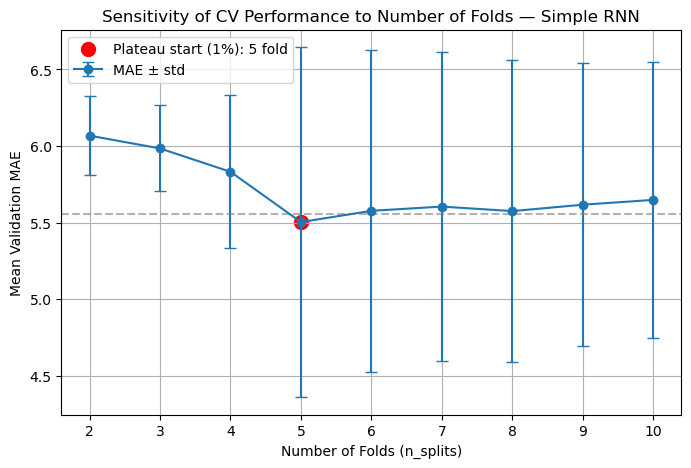

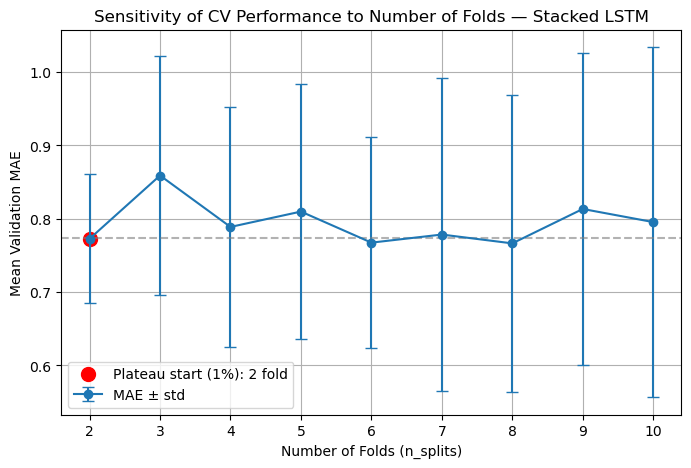

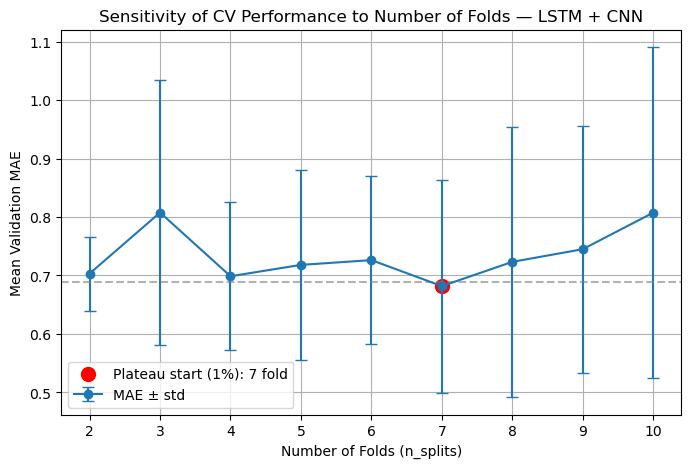

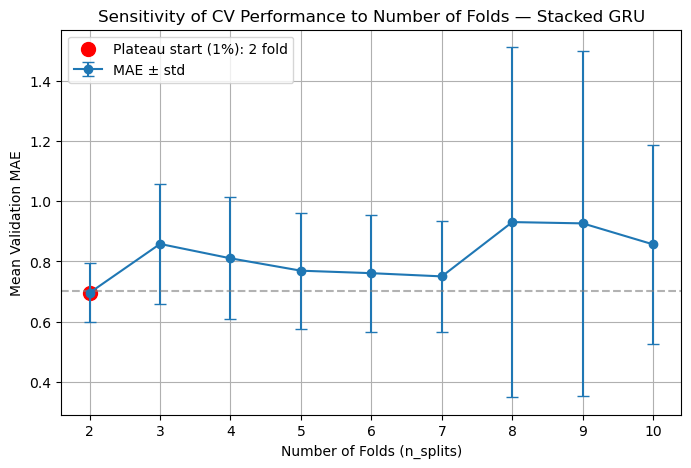

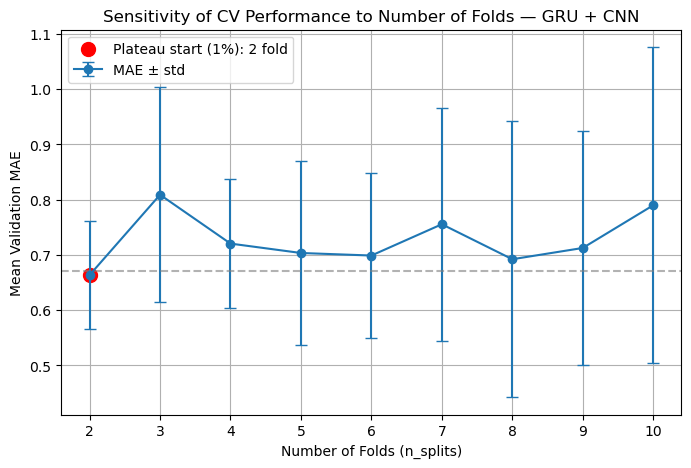

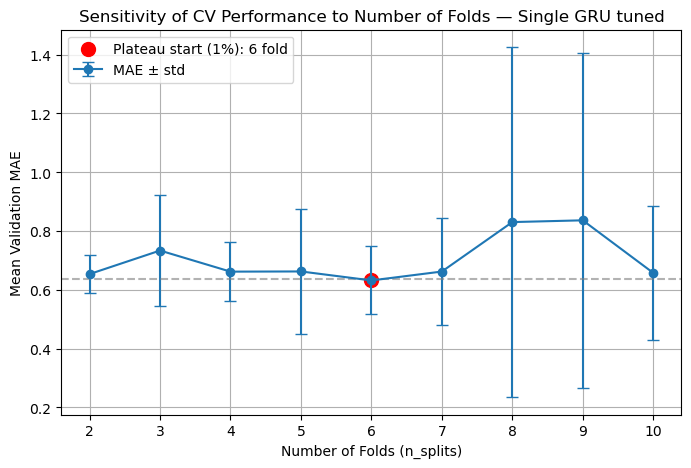

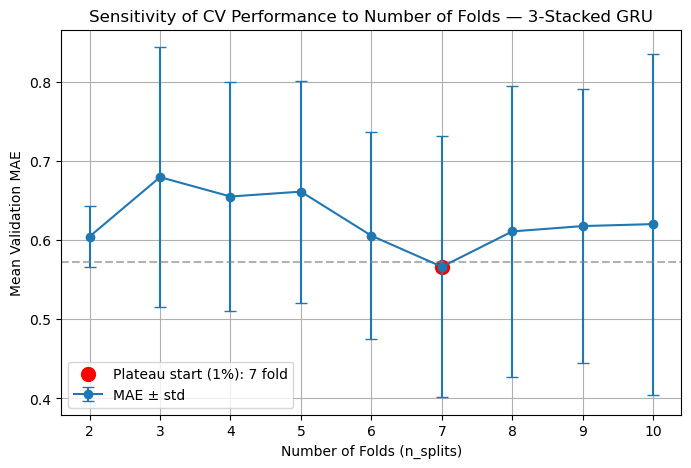

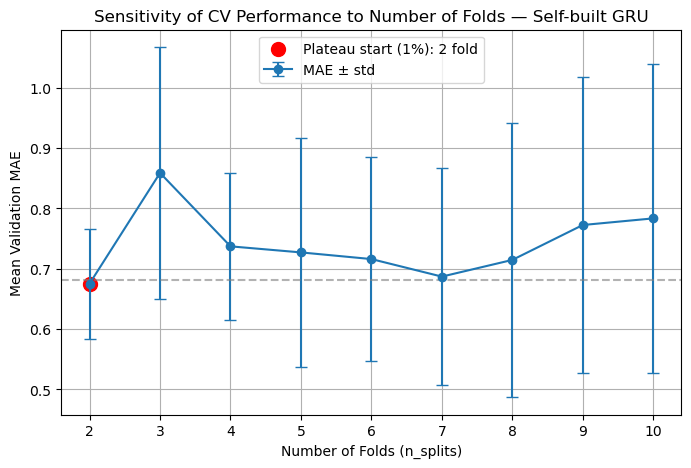

In [16]:
import matplotlib.pyplot as plt

# Define the tolerance when the model plateaus
tol = 0.01 # 1% tolerance

# Minimum consecutive folds with equal or less mean MAE variance than 1%
min_consecutive = 2

for name, data in cv_results.items():

    means = np.array(data['mean'])
    stds = np.array(data['std'])
    fold_values = np.array(fold_values)

    # Define the Plateau point based on the minimum consecutive folds with a MAE change of at max 1%
    min_mae = np.min(means)
    threshold = min_mae * (1 + tol)

    plateau_idx = None
    consecutive_count = 0

    for i in range(len(means)):
        if means[i] <= threshold:
            consecutive_count += 1
            if consecutive_count >= min_consecutive:
                plateau_idx = i - min_consecutive + 1  # Start of the plateau
                break
        else:
            consecutive_count = 0 # It resets if the condition fails

    # In case the previous conditions are not met, it retrieves the default answer
    if plateau_idx is None:
        if len(np.where(means <= threshold)[0]) > 0:
            plateau_idx = np.where(means <= threshold)[0][0] # First index meeting the tolerance
        else:
            0

    plt.figure(figsize=(8, 5))
    plt.errorbar(fold_values, means, yerr=stds, fmt='-o', capsize=4, label="MAE ± std")
    plt.scatter(fold_values[plateau_idx], means[plateau_idx], color='red', s=100, label=f"Plateau start (1%): {fold_values[plateau_idx]} fold")
    plt.axhline(y=threshold, color='gray', linestyle='--', alpha=0.6)
    plt.xlabel("Number of Folds (n_splits)")
    plt.ylabel("Mean Validation MAE")
    plt.title(f"Sensitivity of CV Performance to Number of Folds — {name}")
    plt.grid(True)
    plt.legend()
    plt.show()

## Cross-validation ##

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

# Create a dictionary with the models
models_cv = {
    #'Simple RNN': {'model': simple_rnn, 'n_splits': 5, 'seq_len': 20},
    'Stacked LSTM': {'model': stacked_lstm, 'n_splits': 5, 'seq_len': 30},
    'LSTM + CNN': {'model': tuned_lstm_cnn, 'n_splits': 7, 'seq_len': 30},
    '2-Stacked GRU': {'model': tuned_2_stacked_gru, 'n_splits': 5, 'seq_len': 30},
    'GRU + CNN': {'model': gru_cnn, 'n_splits': 5, 'seq_len': 96},
    'Single GRU tuned': {'model': gru_tuned_single, 'n_splits': 5, 'seq_len': 30},
    '3-Stacked GRU': {'model': tuned_3_stacked_gru, 'n_splits': 5, 'seq_len': 96},
    'Self-built GRU': {'model': gru_self_built_tuned, 'n_splits': 5, 'seq_len': 30}
}

# Create a dictionary to store the CV predictions of each model
predictions_cv = {}

# Final results - Empty dictionary to store the unbiased results
all_metrics = {}
all_metrics_cv = {}
all_fold_metrics = []
all_fold_metrics_CV = []

# Empty dictionary to store predictions
predictions = {}

# tunable parameters
#n_timesteps = 30
batch_size = 32

for name, model_i in models_cv.items():
    n_timesteps = model_i['seq_len']
    n_splits = model_i['n_splits']

    datasets, n_features, y_test_index = prep_ds_rnns(X, y, seq_len = n_timesteps, n_splits = n_splits, batch_size = batch_size)
    print(n_features)

    for train_dataset, val_dataset, test_dataset, scaler_rat in datasets:
        model_ = model_i['model']
        model = model_(n_timesteps, n_features)
        model.fit(train_dataset,
                validation_data=val_dataset,
                epochs=50,
                batch_size=32,
                shuffle=False, # Chronological order matters, so no shuffle
                callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)],
                verbose=0)
        
        # Predict in the validation set to compare with the unbiased results
        y_preds_cv, y_val_cv = [], []
        for x_batch_cv, y_batch_cv in val_dataset:
            y_pred_cv = model.predict(x_batch_cv, verbose=0)
            y_preds_cv.extend(y_pred_cv)
            y_val_cv.extend(y_batch_cv.numpy())

        # Convert pred and true values in a numpy array for the metrics computation
        y_preds_cv = np.array(y_preds_cv).flatten()
        y_trues_cv = np.array(y_val_cv).flatten()

        # Inverse the normalization
        y_cv_inv = scaler_rat.inverse_transform(y_preds_cv.reshape(-1, 1)).flatten()
        y_trues_cv = scaler_rat.inverse_transform(y_trues_cv.reshape(-1, 1)).flatten()

        # Save the CV predictions for visualization later on
        predictions_cv[name] = y_cv_inv

        metrics_cv = {
            'MAE': mean_absolute_error(y_trues_cv, y_cv_inv),
            'MSE': mean_squared_error(y_trues_cv, y_cv_inv),
            'R^2 Score': r2_score(y_trues_cv, y_cv_inv),
            'Forecast bias': np.mean(y_cv_inv - y_trues_cv),
            'MAPE': mean_absolute_percentage_error(y_trues_cv, y_cv_inv)
        }

        all_fold_metrics_CV.append(metrics_cv)

    final_cv_metrics = {k: np.mean([fold[k] for fold in all_fold_metrics_CV]) for k in all_fold_metrics_CV[0]}
    all_metrics_cv[name] = final_cv_metrics


C:\Users\mapim\AppData\Local\Temp\ipykernel_84540\1537027425.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_tr, y_val = y_train_cv[train_idx], y_train_cv[val_idx]
C:\Users\mapim\AppData\Local\Temp\ipykernel_84540\1537027425.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_tr['Duração'] = scaler_dur.fit_transform(X_tr['Duração'].values.reshape(-1, 1))
C:\Users\mapim\AppData\Local\Temp\ipykernel_84540\1537027425.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

109


c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\

109


c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the fi

109


c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\

109


c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the fi

109


c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\

109


c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\

109


c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\

In [15]:
# Create a dataframe to compare the metrics of the models
metrics_df_cv = pd.DataFrame.from_dict(all_metrics_cv, orient='index')

# Reset index to show models as a column
metrics_df_cv = metrics_df_cv.reset_index().rename(columns={'index': 'Model'})

metrics_df_cv

,Model,MAE,MSE,R^2 Score,Forecast bias,MAPE
0,Stacked LSTM,0.733167,1.584913,0.804513,0.053424,0.459792
1,LSTM + CNN,0.594140,1.044384,0.869328,0.108443,0.378334
2,2-Stacked GRU,0.576653,0.930622,0.882582,0.112759,0.377272
3,GRU + CNN,0.632481,1.072287,0.862427,0.125670,0.418863
4,Single GRU tuned,0.613898,0.992914,0.872195,0.124928,0.413400
5,3-Stacked GRU,0.643360,1.071463,0.860813,0.142484,0.437243
6,Self-built GRU,0.638423,1.029869,0.866076,0.148786,0.439380


## Final Model Evaluation ##

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from keras.utils import timeseries_dataset_from_array
from numpy import array

# Indexes of numerical features and high cardinality categorical variables
prog_idx_st = X.columns.get_loc('VARIOS') #The program starts after the "Varios" and 'Terça' without the pivot/host
prog_idx_end = X.columns.get_loc('VAI OU RACHA')
prog_idx_pca = list(range(prog_idx_st + 1, prog_idx_end+1))

def prep_test_eval (X, y, n_timesteps, batch_size):
    
    X_train_cv, X_test, y_train_cv, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    y_test_index = y_test.index

    scaler_dur = MinMaxScaler(feature_range=(-1, 1))
    X_train_cv['Duração'] = scaler_dur.fit_transform(X_train_cv['Duração'].values.reshape(-1, 1))
    X_test['Duração'] = scaler_dur.transform(X_test['Duração'].values.reshape(-1, 1))

    scaler_rat = MinMaxScaler(feature_range=(-1, 1))
    y_train_scaled = scaler_rat.fit_transform(array(y_train_cv).reshape(-1, 1))
    y_test_scaled = scaler_rat.transform(array(y_test).reshape(-1, 1))

    pca = PCA(n_components=28, random_state=42)
    X_tr_pca = pca.fit_transform(X_train_cv.iloc[:, prog_idx_st+1:prog_idx_end])
    X_test_pca = pca.transform(X_test.iloc[:, prog_idx_st+1:prog_idx_end])

    # ------------------- Feature Selection ----------------------

    cols_before = X.columns[:prog_idx_st+1]
    cols_after = X.columns[prog_idx_end+1:]
    orig_cols = list(cols_before) + list(cols_after)
    pca_cols = [f"PCA_{i+1}" for i in range(X_tr_pca.shape[1])]
    all_cols = orig_cols + pca_cols

    X_tr_final = pd.DataFrame(
        np.hstack([X_train_cv[orig_cols].values, X_tr_pca]),
        index=X_train_cv.index,
        columns=all_cols
    )

    X_test_final = pd.DataFrame(
        np.hstack([X_test[orig_cols].values, X_test_pca]),
        index=X_test.index,
        columns=all_cols
    )

    '''# Now concat for correlation
    X_rebuilt = pd.concat([X_tr_final, X_test_final])
    y_rebuilt = pd.Series(
        np.concatenate([y_train_scaled.ravel(), y_test_scaled.ravel()]),
        name="Universo rat%"
    )

    X_corr = pd.concat([X_rebuilt, y_rebuilt], axis=1).corr()

    # Feature ranking
    X_n_feat = abs(X_corr['Universo rat%']).sort_values(ascending=False).iloc[1:11]  # skip target itself

    # Define the time dependent columns
    necessary_cols = ['Hora Início_sin', 'Hora Início_cos', 'Hora Fim_sin', 'Hora Fim_cos']

    # Ensure necessary cols are included
    missing = set(necessary_cols) - set(X_n_feat.index)
    X_10 = X_n_feat.index.append(pd.Index(missing))

    # Select features
    X_tr_final, X_test_final = X_tr_final[X_10], X_test_final[X_10]'''

    # Get the number of features
    n_features = X_tr_final.shape[1]

    # --- Create RNN datasets ---
    train_dataset = timeseries_dataset_from_array(
        data=X_tr_final, targets=y_train_scaled,
        sequence_length=n_timesteps, batch_size=batch_size, shuffle=False
    )

    test_dataset = timeseries_dataset_from_array(
        data=X_test_final, targets=y_test_scaled,
        sequence_length=n_timesteps, batch_size=batch_size, shuffle=False
    )
    
    datasets = []

    datasets.append((train_dataset, test_dataset, scaler_rat))

    return datasets, n_features, y_test_index

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define the batch size
batch_size = 32

# Models
models_ = {
    #'Simple RNN': {'model': simple_rnn, 'n_splits': 5, 'seq_len': 20},
    'Stacked LSTM': {'model': stacked_lstm, 'seq_len': 30},
    'LSTM + CNN': {'model': tuned_lstm_cnn, 'seq_len': 30},
    '2-Stacked GRU': {'model': tuned_2_stacked_gru, 'seq_len': 30},
    'GRU + CNN': {'model': gru_cnn, 'seq_len': 96},
    'Single GRU tuned': {'model': gru_tuned_single, 'seq_len': 30},
    '3-Stacked GRU': {'model': tuned_3_stacked_gru, 'seq_len': 96},
    'Self-built GRU': {'model': gru_self_built_tuned, 'seq_len': 30}
}

# Dictionaries to store the results
all_metrics= {}  # Store final unbiased test results
predictions_test = {}
weights = {}

for name, model_i in models_.items():
    print(f"\nFinal test evaluation for model: {name}")
    
    n_timesteps = model_i['seq_len']

    # Extract the datasets, number of features and y_test_index from the test eval preparation function
    final_datasets, n_features, y_test_index = prep_test_eval(X, y, n_timesteps, batch_size)
    train_dataset, test_dataset, scaler_rat = final_datasets[0]
    print(n_features)
    
    model = model_i['model'](n_timesteps, n_features) 

    # Train on ALL train + validation
    model.fit(
        train_dataset,
        epochs=50,
        batch_size=batch_size,
        shuffle=False,
        callbacks=[
            EarlyStopping(monitor='loss', patience=5, restore_best_weights=True),
            ReduceLROnPlateau(factor=0.5, patience=3)
        ],
        verbose=0
    )

    X_test_batches = []

    # ---------- Predict on Test Set ----------
    y_preds_test, y_trues_test = [], []
    for x_batch, y_batch in test_dataset:
        y_pred = model.predict(x_batch, verbose=0)
        y_preds_test.extend(y_pred)
        y_trues_test.extend(y_batch.numpy())
        X_test_batches.append(x_batch.numpy())

    # Combine all the test sequences (for attention scores)
    X_test_full = np.vstack(X_test_batches)

    y_preds_test = np.array(y_preds_test).flatten()
    y_trues_test = np.array(y_trues_test).flatten()

    # Inverse transform
    y_preds_test_inv = scaler_rat.inverse_transform(y_preds_test.reshape(-1, 1)).flatten()
    y_trues_test_inv = scaler_rat.inverse_transform(y_trues_test.reshape(-1, 1)).flatten()

    predictions_test[name] = y_preds_test_inv

    # Compute FINAL unbiased metrics
    final_test_metrics = {
        'MAE': mean_absolute_error(y_trues_test_inv, y_preds_test_inv),
        'MSE': mean_squared_error(y_trues_test_inv, y_preds_test_inv),
        'R^2 Score': r2_score(y_trues_test_inv, y_preds_test_inv),
        'Forecast bias': np.mean(y_preds_test_inv - y_trues_test_inv),
        'MAPE': mean_absolute_percentage_error(y_trues_test_inv, y_preds_test_inv)
    }
    all_metrics[name] = final_test_metrics


Final test evaluation for model: Stacked LSTM
109


c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\callbacks\callback_list.py:151: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: loss,learning_rate.
  callback.on_epoch_end(epoch, logs)



Final test evaluation for model: LSTM + CNN
109


c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\callbacks\callback_list.py:151: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: loss,learning_rate.
  callback.on_epoch_end(epoch, logs)



Final test evaluation for model: 2-Stacked GRU
109


c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\callbacks\callback_list.py:151: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: loss,mae,learning_rate.
  callback.on_epoch_end(epoch, logs)



Final test evaluation for model: GRU + CNN
109


c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\callbacks\callback_list.py:151: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: loss,mae,mape,learning_rate.
  callback.on_epoch_end(epoch, logs)



Final test evaluation for model: Single GRU tuned
109


c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\callbacks\callback_list.py:151: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: loss,learning_rate.
  callback.on_epoch_end(epoch, logs)



Final test evaluation for model: 3-Stacked GRU
109


c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\callbacks\callback_list.py:151: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: loss,learning_rate.
  callback.on_epoch_end(epoch, logs)



Final test evaluation for model: Self-built GRU
109


c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\callbacks\callback_list.py:151: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


In [14]:
# Create a dataframe to compare the metrics of the models
metrics_df_unbiased = pd.DataFrame.from_dict(all_metrics, orient='index')

# Reset index to show models as a column
metrics_df_unbiased = metrics_df_unbiased.reset_index().rename(columns={'index': 'Model'})

metrics_df_unbiased

,Model,MAE,MSE,R^2 Score,Forecast bias,MAPE
0,Stacked LSTM,0.439844,0.429629,0.941898,0.158266,0.351453
1,LSTM + CNN,0.345201,0.275111,0.962795,-0.092647,0.213869
2,2-Stacked GRU,0.328514,0.246148,0.966712,-0.072243,0.202978
3,GRU + CNN,0.559284,0.805535,0.891829,0.083402,0.354670
4,Single GRU tuned,0.426242,0.530797,0.928217,-0.321885,0.197051
5,3-Stacked GRU,0.481490,0.607710,0.918394,-0.018944,0.304190
6,Self-built GRU,0.355845,0.342878,0.953630,-0.101674,0.215512


## Forecast visualization ##


Processing Stacked LSTM with seq_len = 30
Aligned lengths -> y_true: 6980, y_pred: 6980, y_idx: 6980


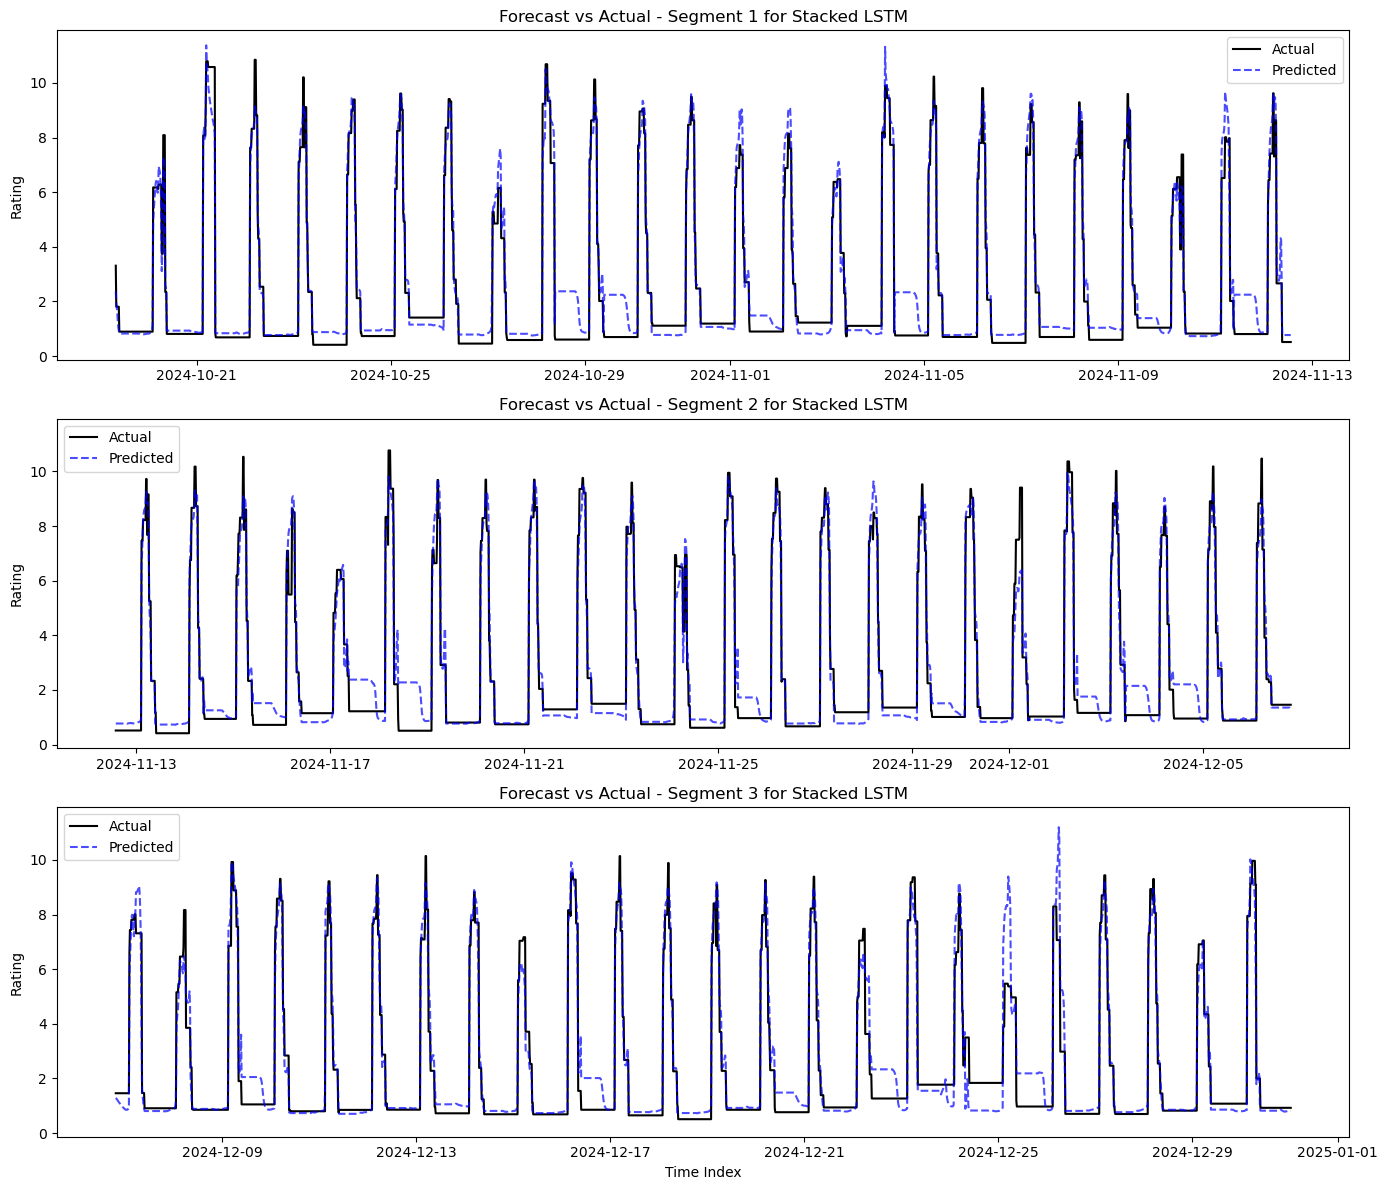


Processing LSTM + CNN with seq_len = 30
Aligned lengths -> y_true: 6980, y_pred: 6980, y_idx: 6980


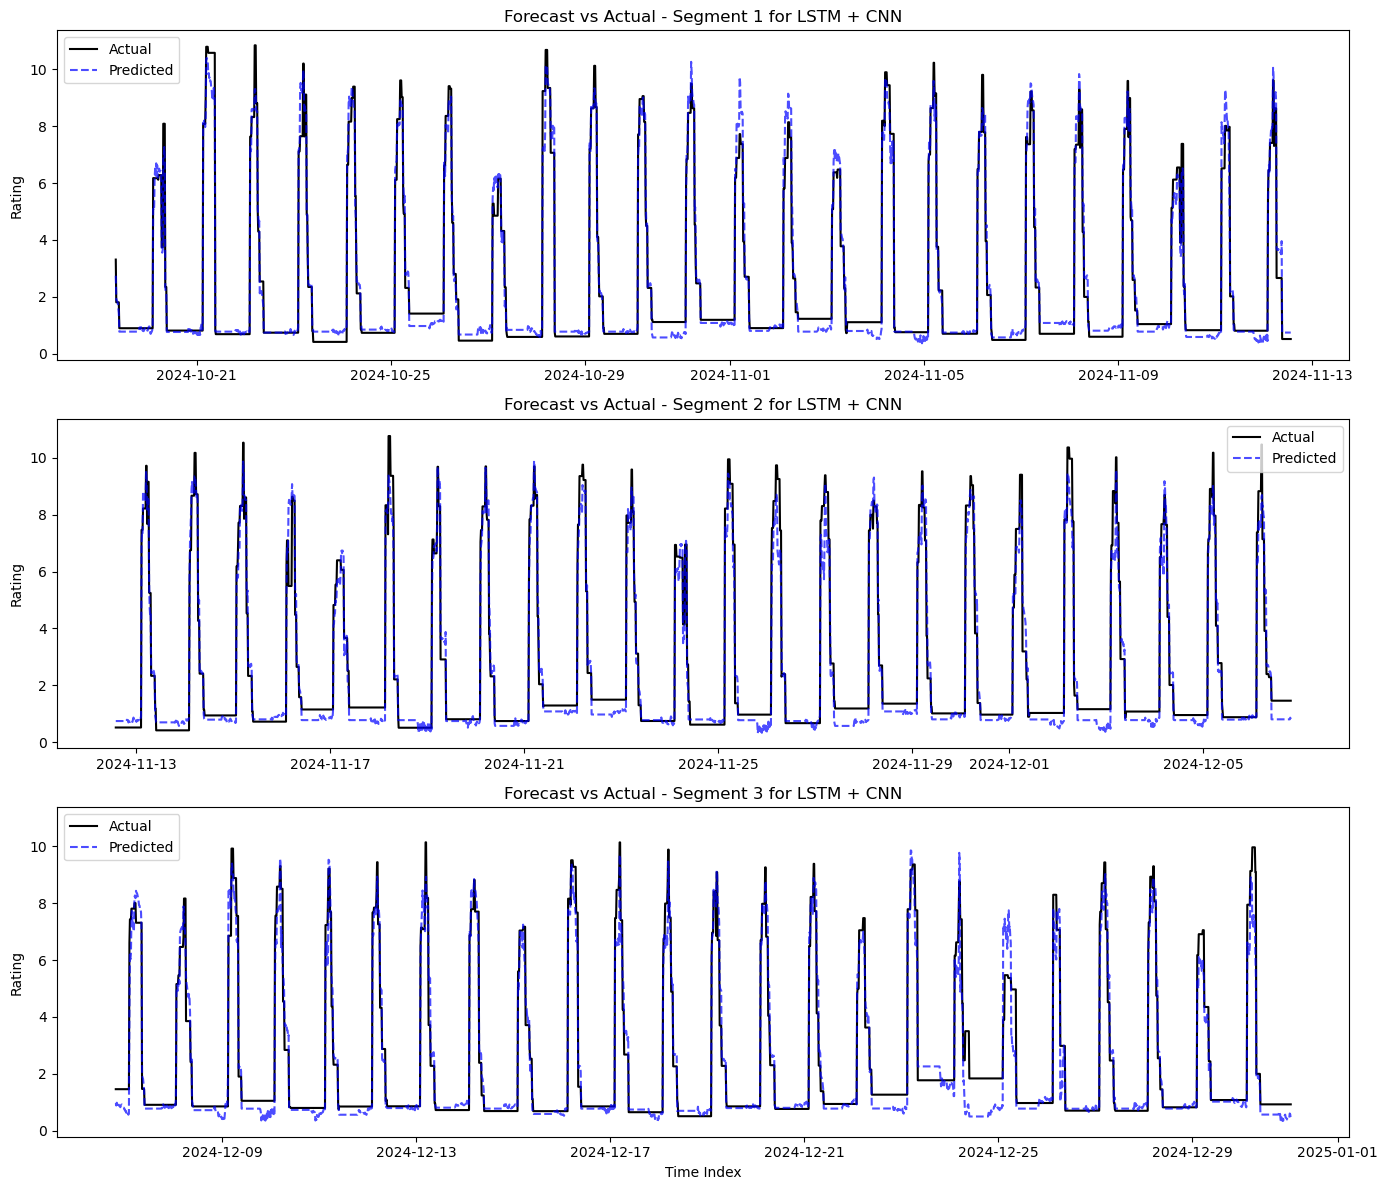


Processing 2-Stacked GRU with seq_len = 30
Aligned lengths -> y_true: 6980, y_pred: 6980, y_idx: 6980


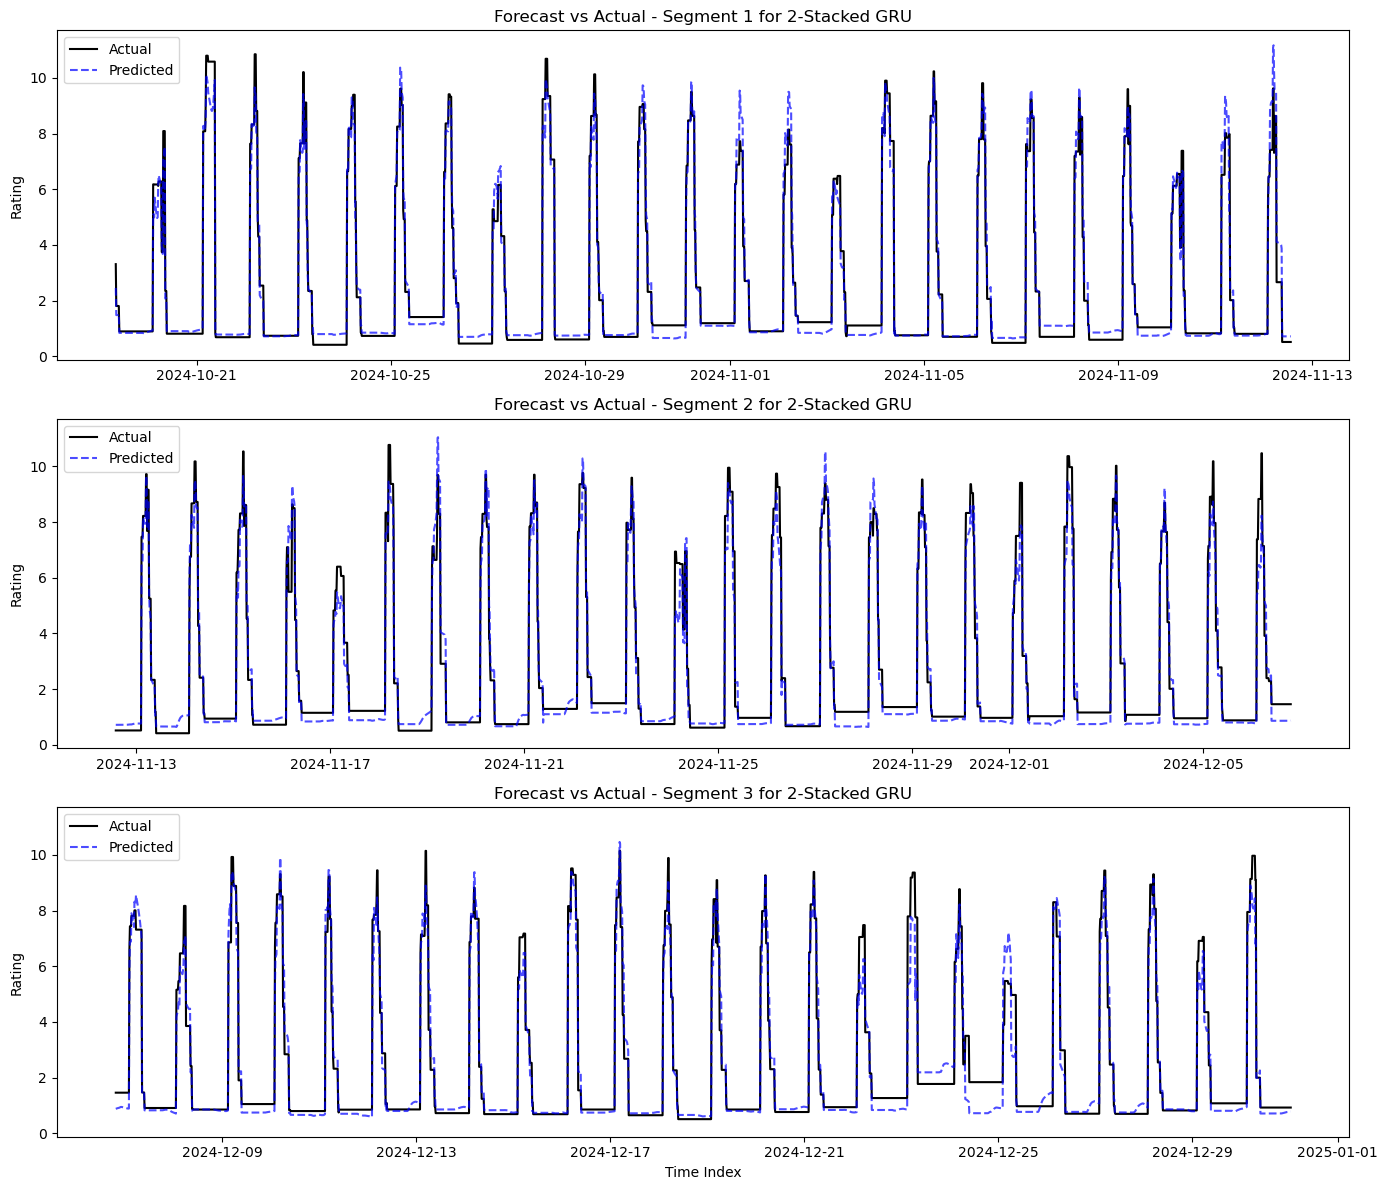


Processing GRU + CNN with seq_len = 96
Aligned lengths -> y_true: 6914, y_pred: 6914, y_idx: 6914


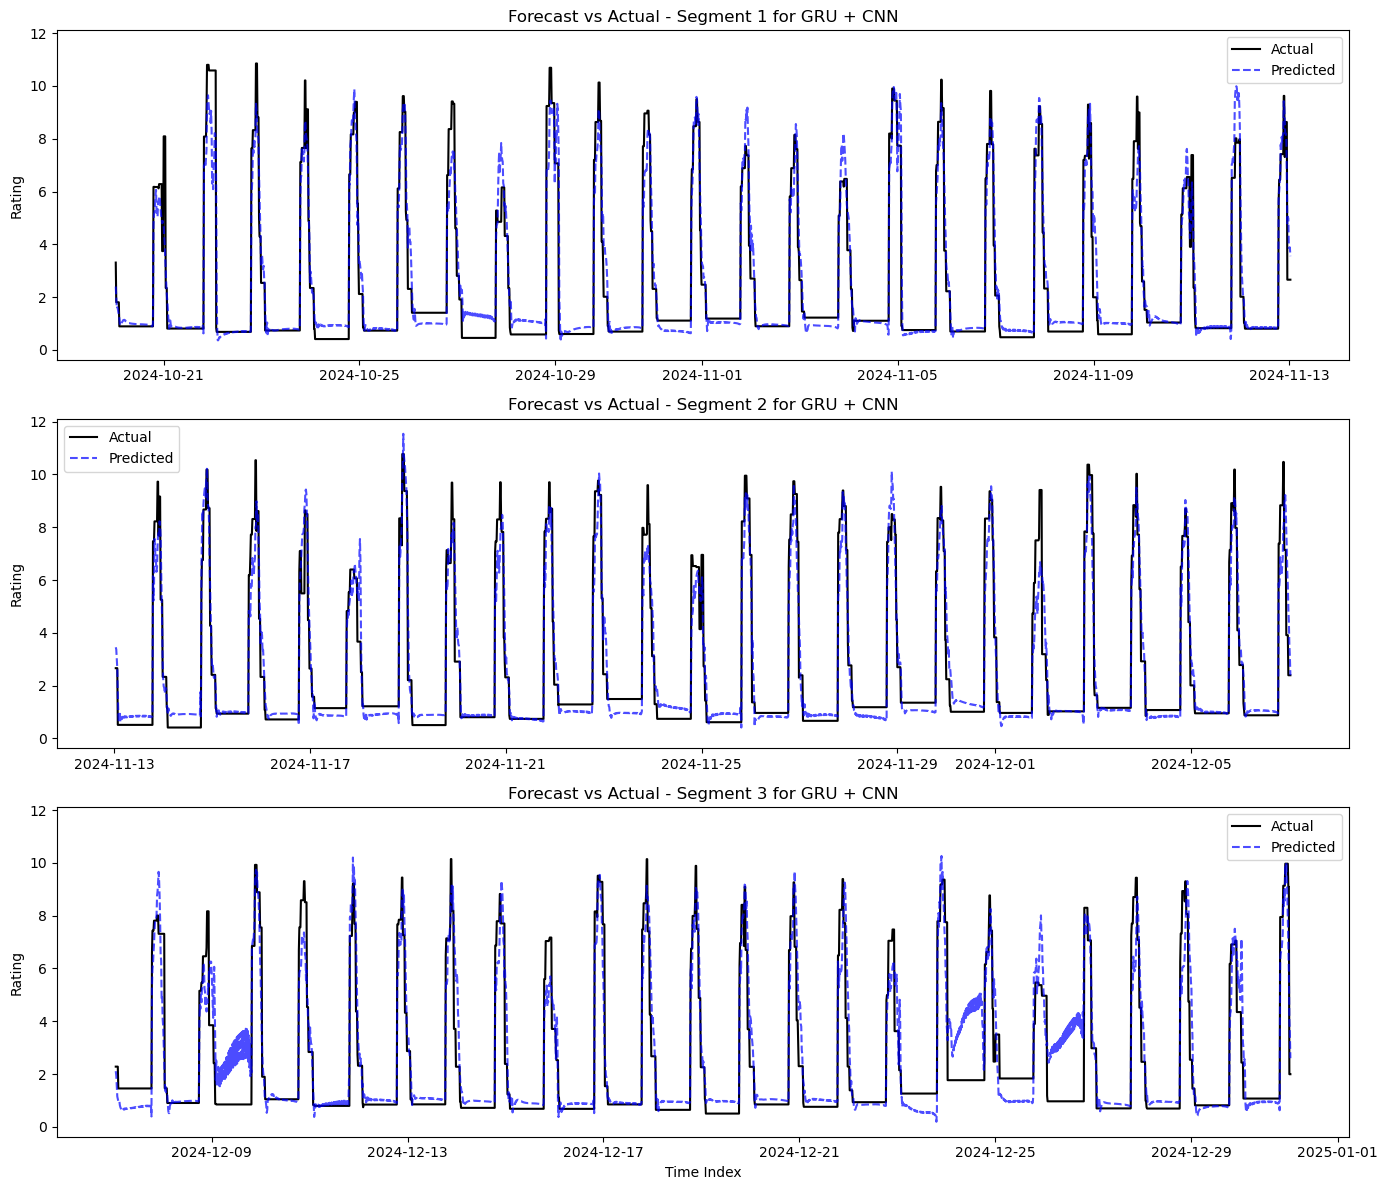


Processing Single GRU tuned with seq_len = 30
Aligned lengths -> y_true: 6980, y_pred: 6980, y_idx: 6980


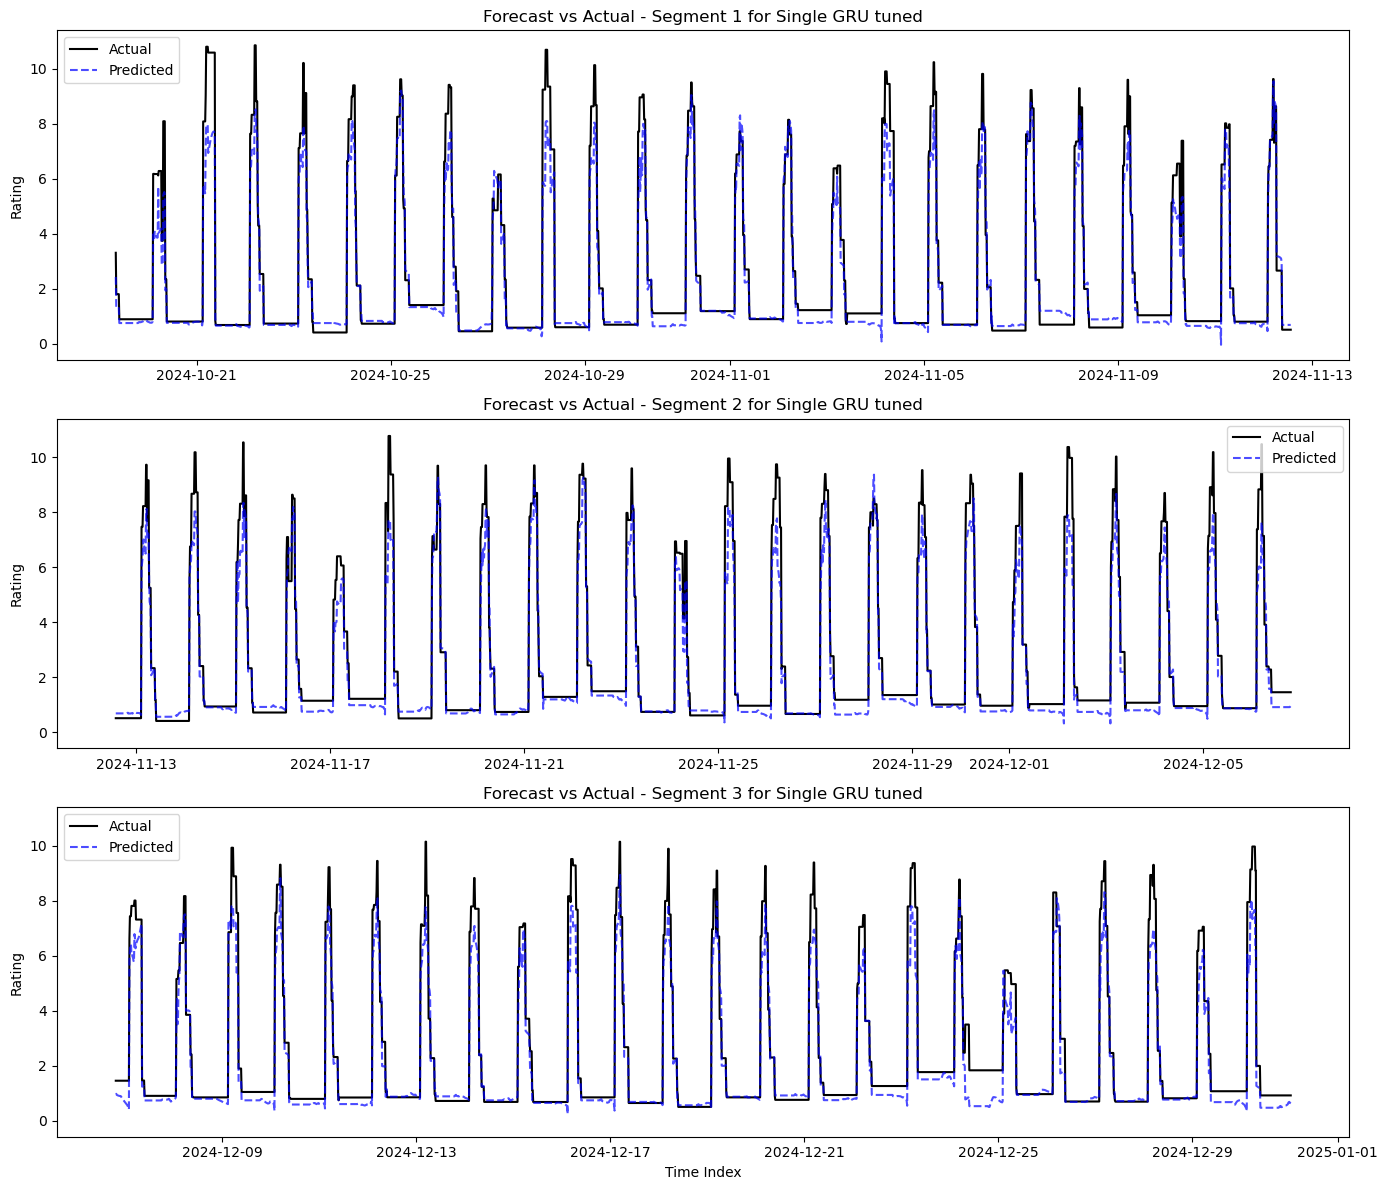


Processing 3-Stacked GRU with seq_len = 96
Aligned lengths -> y_true: 6914, y_pred: 6914, y_idx: 6914


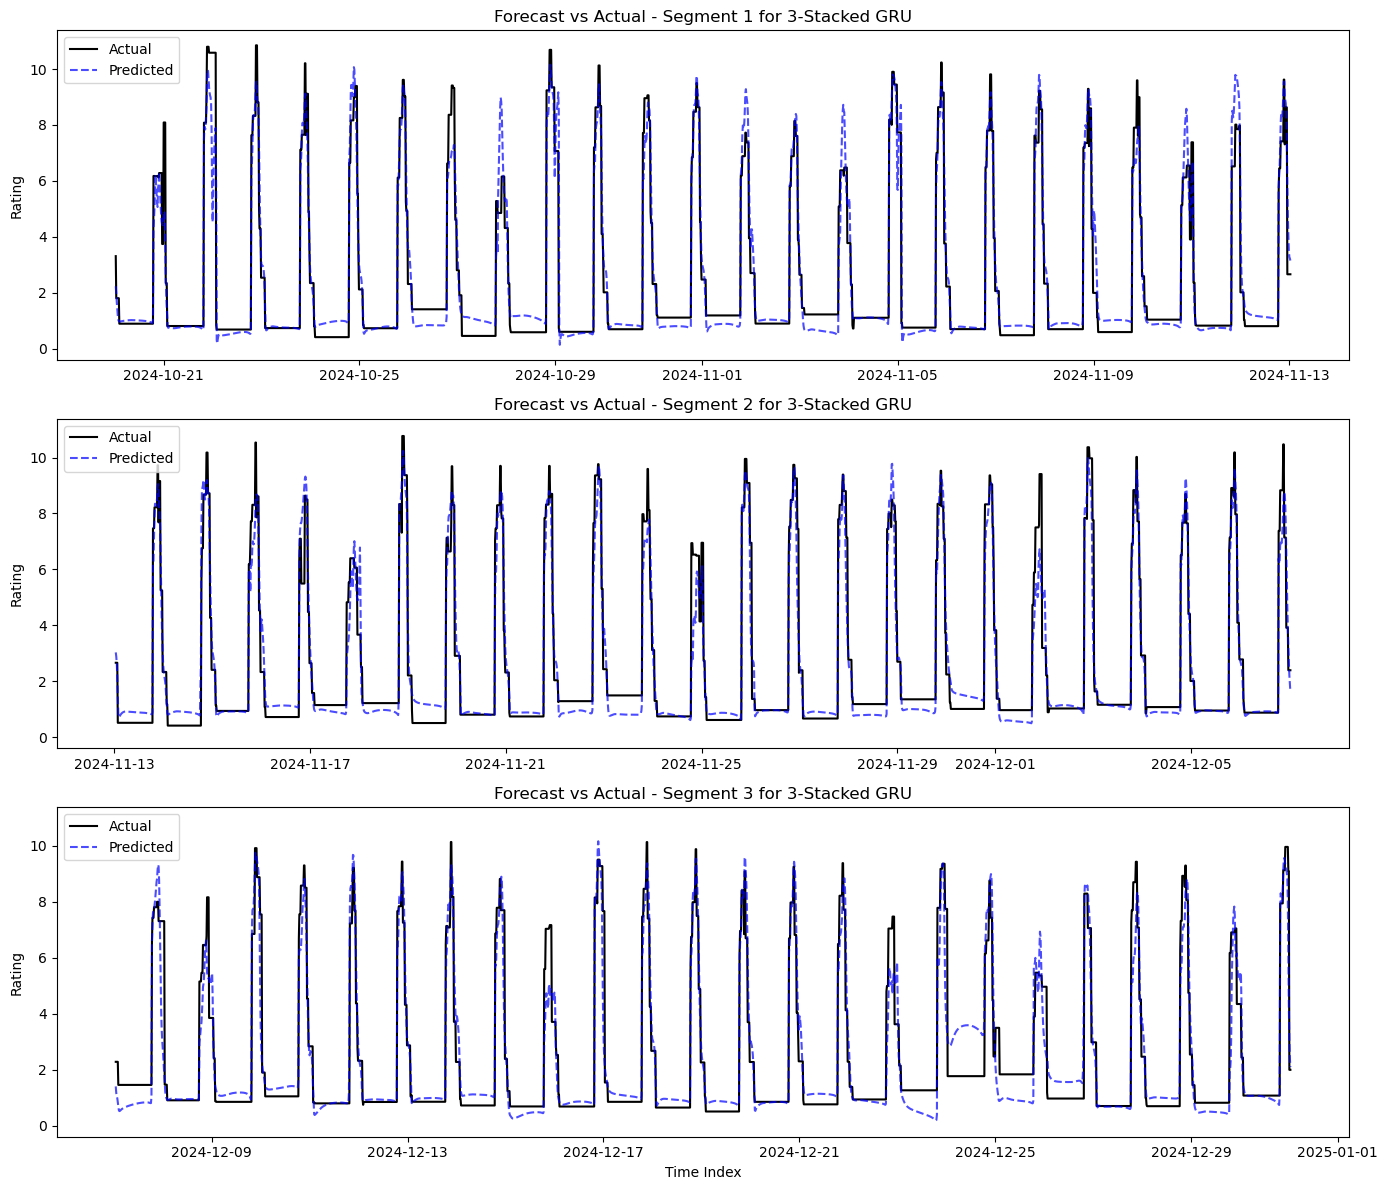


Processing Self-built GRU with seq_len = 30
Aligned lengths -> y_true: 6980, y_pred: 6980, y_idx: 6980


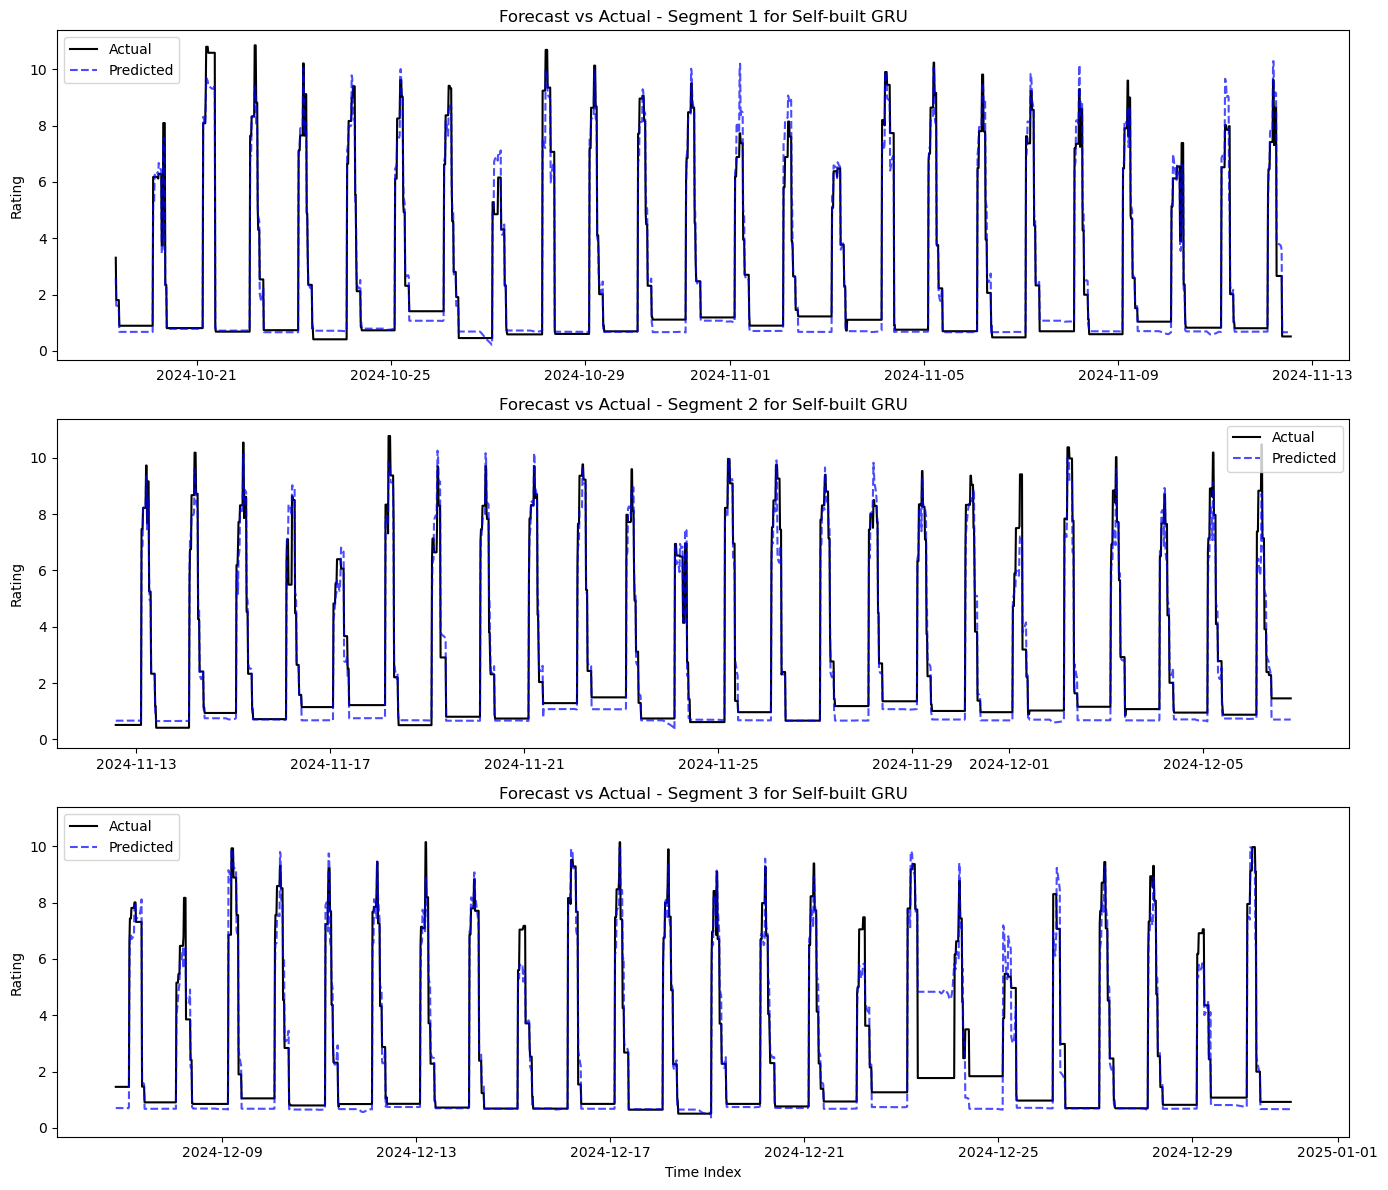

In [15]:
import matplotlib.pyplot as plt
import numpy as np

for name, model_info in models_.items():
    seq_len = model_info['seq_len']  # Get the specific timesteps for this model
    print(f"\nProcessing {name} with seq_len = {seq_len}")

    y_true = np.array(y_trues_test_inv)
    y_pred = np.array(predictions_test[name])
    y_idx = np.array(y_test_index)

    # 1. Adjust index for timesteps
    y_idx = y_idx[seq_len - 1:]  # Drop first seq_len-1 entries

    # 2. Ensure same length for all arrays
    min_len = min(len(y_true), len(y_pred), len(y_idx))
    y_true = y_true[:min_len]
    y_pred = y_pred[:min_len]
    y_idx = y_idx[:min_len]

    print(f"Aligned lengths -> y_true: {len(y_true)}, y_pred: {len(y_pred)}, y_idx: {len(y_idx)}")

    # 3. Split into 3 roughly equal segments
    splits = np.array_split(np.arange(min_len), 3)

    # 4. Plot
    fig, axs = plt.subplots(3, 1, figsize=(14, 12), sharey=True)
    for i, idx in enumerate(splits):
        axs[i].plot(y_idx[idx], y_true[idx], label="Actual", color="black")
        axs[i].plot(y_idx[idx], y_pred[idx], label="Predicted", color="blue", alpha=0.7, linestyle="dashed")
        axs[i].set_title(f"Forecast vs Actual - Segment {i+1} for {name}")
        axs[i].set_ylabel("Rating")
        axs[i].legend()

    axs[-1].set_xlabel("Time Index")
    plt.tight_layout()
    plt.show()


## Hyperparameter tuning using Keras Tuner ##

In [13]:
import keras_tuner as kt

n_timesteps = 30
batch_size = 32
n_splits = 5

datasets, n_features, y_test_index = prep_ds_rnns(X, y, seq_len = n_timesteps, n_splits = n_splits, batch_size = batch_size)

# tune only the first fold
train_dataset, val_dataset, test_dataset, scaler_rat = datasets[0]

# 1. Define build function - for 2-stacked GRU (one of the promising models)
def build_stacked_gru_2(hp):
    model = Sequential()
    model.add(GRU(units=hp.Int('gru1_units', 32, 96, step=32),
                  return_sequences=True,
                  input_shape=(n_timesteps, n_features),
                  activation=hp.Choice('activation', ['relu', 'tanh'])))
    
    model.add(Dropout(hp.Float('dropout', 0.1, 0.25, step=0.05)))
    
    model.add(GRU(units=hp.Int('gru2_units', 32, 64, step=32),
                  activation=hp.Choice('activation2', ['relu', 'tanh'])))
    
    model.add(Dense(1))
    
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', [1e-3, 5e-4, 2e-4])),
        loss=Huber(),
        metrics=['mae']
    )
    return model

# 2. Create tuner
tuner = kt.RandomSearch(
    build_stacked_gru_2,
    objective='val_mae',
    max_trials=8,
    executions_per_trial=1,
    directory='keras_tuner',
    project_name='gru2_tuning'
)

# 3. Run search
tuner.search(train_dataset,
            epochs=8,  # small for speed
            batch_size=32,
            validation_data=val_dataset)

# See the results summary
tuner.results_summary()

# See the best hyperparameters
best_hp = tuner.get_best_hyperparameters(1)[0]
print(best_hp.values)

# 4. Save best model
best_model = tuner.get_best_models(num_models=1)[0]
print(best_model)
best_model.save('best_gru2.keras')

Trial 8 Complete [00h 00m 39s]
val_mae: 0.2007954865694046

Best val_mae So Far: 0.18076302111148834
Total elapsed time: 00h 05m 46s
Results summary
Results in keras_tuner\gru2_tuning
Showing 10 best trials
Objective(name="val_mae", direction="min")

Trial 1 summary
Hyperparameters:
gru1_units: 64
activation: relu
dropout: 0.2
gru2_units: 32
activation2: tanh
learning_rate: 0.001
Score: 0.18076302111148834

Trial 2 summary
Hyperparameters:
gru1_units: 64
activation: relu
dropout: 0.1
gru2_units: 64
activation2: tanh
learning_rate: 0.001
Score: 0.1875205934047699

Trial 0 summary
Hyperparameters:
gru1_units: 96
activation: tanh
dropout: 0.1
gru2_units: 64
activation2: relu
learning_rate: 0.0005
Score: 0.19950267672538757

Trial 7 summary
Hyperparameters:
gru1_units: 64
activation: tanh
dropout: 0.2
gru2_units: 32
activation2: relu
learning_rate: 0.001
Score: 0.2007954865694046

Trial 4 summary
Hyperparameters:
gru1_units: 32
activation: tanh
dropout: 0.15000000000000002
gru2_units: 32
a

c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [14]:
print(best_hp.values)

{'gru1_units': 64, 'activation': 'relu', 'dropout': 0.2, 'gru2_units': 32, 'activation2': 'tanh', 'learning_rate': 0.001}


In [ ]:
import keras_tuner as kt
from keras.models import Sequential
from keras.layers import GRU, Dropout, Dense
from keras.optimizers import Adam
from keras.losses import Huber

n_timesteps = 30
batch_size = 32
n_splits = 5

datasets, n_features, y_test_index = prep_ds_rnns(X, y, seq_len = n_timesteps, n_splits = n_splits, batch_size = batch_size)

# tune only the first fold
train_dataset, val_dataset, test_dataset, scaler_rat = datasets[0]

# Build function for Keras Tuner
def build_gru_self_built(hp):
    model = Sequential()

    # First GRU layer
    model.add(GRU(
        units=hp.Int('gru1_units', min_value=32, max_value=96, step=32),
        return_sequences=True,
        input_shape=(n_timesteps, n_features),
        activation=hp.Choice('activation1', values=['relu', 'tanh'])
    ))
    model.add(Dropout(hp.Float('dropout1', min_value=0.1, max_value=0.25, step=0.05)))

    # Second GRU layer
    model.add(GRU(
        units=hp.Int('gru2_units', min_value=32, max_value=64, step=32),
        return_sequences=True,
        activation=hp.Choice('activation2', values=['relu', 'tanh'])
    ))
    model.add(Dropout(hp.Float('dropout2', min_value=0.1, max_value=0.25, step=0.05)))

    # Third GRU layer
    model.add(GRU(
        units=hp.Int('gru3_units', min_value=32, max_value=64, step=32),
        return_sequences=True,
        activation=hp.Choice('activation3', values=['relu', 'tanh'])
    ))
    model.add(Dropout(hp.Float('dropout3', min_value=0.1, max_value=0.25, step=0.05)))

    # Fourth GRU layer (final, no return_sequences)
    model.add(GRU(
        units=hp.Int('gru4_units', min_value=32, max_value=64, step=32),
        activation=hp.Choice('activation4', values=['relu', 'tanh'])
    ))

    # Output layer
    model.add(Dense(1))

    # Compile
    model.compile(
        optimizer=Adam(
            learning_rate=hp.Choice('learning_rate', values=[1e-3, 5e-4, 2e-4])
        ),
        loss=Huber(),
        metrics=['mae']
    )

    return model

# Create tuner
tuner_self_built = kt.RandomSearch(
    build_gru_self_built,
    objective='val_mae',
    max_trials=10,              # Keep small for faster runtime
    executions_per_trial=1,
    directory='keras_tuner',
    project_name='gru_self_built_tuning'
)

# Run search
tuner_self_built.search(
    train_dataset,
    epochs=8,                  # Small for speed
    batch_size=32,
    validation_data=val_dataset
)

# Summaries
tuner_self_built.results_summary()

# Best hyperparameters
best_hp_self_built = tuner_self_built.get_best_hyperparameters(1)[0]
print("Best hyperparameters:", best_hp_self_built.values)

# Save best model
best_model_self_built = tuner_self_built.get_best_models(num_models=1)[0]
best_model_self_built.save('best_gru_self_built.keras')

Trial 10 Complete [00h 01m 24s]
val_mae: 0.17054036259651184

Best val_mae So Far: 0.16355904936790466
Total elapsed time: 00h 15m 19s
Results summary
Results in keras_tuner\gru_self_built_tuning
Showing 10 best trials
Objective(name="val_mae", direction="min")

Trial 06 summary
Hyperparameters:
gru1_units: 96
activation1: relu
dropout1: 0.1
gru2_units: 32
activation2: tanh
dropout2: 0.1
gru3_units: 64
activation3: relu
dropout3: 0.1
gru4_units: 32
activation4: relu
learning_rate: 0.001
Score: 0.16355904936790466

Trial 09 summary
Hyperparameters:
gru1_units: 32
activation1: relu
dropout1: 0.1
gru2_units: 32
activation2: tanh
dropout2: 0.15000000000000002
gru3_units: 64
activation3: tanh
dropout3: 0.15000000000000002
gru4_units: 64
activation4: tanh
learning_rate: 0.001
Score: 0.17054036259651184

Trial 08 summary
Hyperparameters:
gru1_units: 64
activation1: relu
dropout1: 0.15000000000000002
gru2_units: 64
activation2: relu
dropout2: 0.2
gru3_units: 64
activation3: relu
dropout3: 0.2


c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [13]:
# Best hyperparameters
best_hp_self_built = tuner_self_built.get_best_hyperparameters(1)[0]
print("Best hyperparameters:", best_hp_self_built.values)

Best hyperparameters: {'gru1_units': 96, 'activation1': 'relu', 'dropout1': 0.1, 'gru2_units': 32, 'activation2': 'tanh', 'dropout2': 0.1, 'gru3_units': 64, 'activation3': 'relu', 'dropout3': 0.1, 'gru4_units': 32, 'activation4': 'relu', 'learning_rate': 0.001}


In [14]:
import keras_tuner as kt
from keras.models import Sequential
from keras.layers import GRU, Dropout, Dense
from keras.optimizers import Adam
from keras.losses import Huber

# ---------------- CONFIGURATION ----------------
n_timesteps = 96  # as you mentioned this model uses 96 timesteps
batch_size = 32
n_splits = 5

# Prepare the datasets
datasets, n_features, y_test_index = prep_ds_rnns(
    X, y, seq_len=n_timesteps, n_splits=n_splits, batch_size=batch_size
)

# Use only the first fold for tuning
train_dataset, val_dataset, test_dataset, scaler_rat = datasets[0]

# ---------------- BUILD FUNCTION ----------------
def build_gru_tuned_3(hp):
    model = Sequential()

    # First GRU layer
    model.add(GRU(
        units=hp.Int('gru1_units', min_value=32, max_value=128, step=32),
        return_sequences=True,
        input_shape=(n_timesteps, n_features),
        activation=hp.Choice('activation1', ['relu', 'tanh'])
    ))

    # First Dropout
    model.add(Dropout(hp.Float('dropout1', min_value=0.15, max_value=0.30, step=0.05)))

    # Second GRU layer
    model.add(GRU(
        units=hp.Int('gru2_units', min_value=32, max_value=128, step=32),
        return_sequences=True,
        activation=hp.Choice('activation2', ['relu', 'tanh'])
    ))

    # Second Dropout
    model.add(Dropout(hp.Float('dropout2', min_value=0.15, max_value=0.30, step=0.05)))

    # Third GRU layer (final)
    model.add(GRU(
        units=hp.Int('gru3_units', min_value=32, max_value=128, step=32),
        activation=hp.Choice('activation3', ['relu', 'tanh'])
    ))

    # Output layer
    model.add(Dense(1))

    # Compile the model
    model.compile(
        optimizer=Adam(
            learning_rate=hp.Choice('learning_rate', values=[1e-3, 5e-4, 2e-4, 1e-4])
        ),
        loss=Huber(),
        metrics=['mae']
    )

    return model

# ---------------- TUNER SETUP ----------------
tuner_gru_tuned_3 = kt.RandomSearch(
    build_gru_tuned_3,
    objective='val_mae',
    max_trials=15,  # keep small for faster runtime
    executions_per_trial=1,
    directory='keras_tuner',
    project_name='gru_tuned_3'
)

# ---------------- RUN SEARCH ----------------
tuner_gru_tuned_3.search(
    train_dataset,
    epochs=10,                  # small to save time
    validation_data=val_dataset # DO NOT add batch_size here because dataset is already batched
)

# ---------------- RESULTS ----------------
tuner_gru_tuned_3.results_summary()

# Retrieve the best hyperparameters
best_hp_gru_tuned_3 = tuner_gru_tuned_3.get_best_hyperparameters(1)[0]
print("Best hyperparameters:", best_hp_gru_tuned_3.values)

# Retrieve and save the best model
best_model_gru_tuned_3 = tuner_gru_tuned_3.get_best_models(num_models=1)[0]
best_model_gru_tuned_3.save('best_gru_tuned_3.keras')


Trial 15 Complete [00h 04m 40s]
val_mae: 0.27796998620033264

Best val_mae So Far: 0.2741386890411377
Total elapsed time: 01h 20m 32s
Results summary
Results in keras_tuner\gru_tuned_3
Showing 10 best trials
Objective(name="val_mae", direction="min")

Trial 04 summary
Hyperparameters:
gru1_units: 128
activation1: relu
dropout1: 0.15
gru2_units: 96
activation2: relu
dropout2: 0.2
gru3_units: 64
activation3: relu
learning_rate: 0.0002
Score: 0.2741386890411377

Trial 02 summary
Hyperparameters:
gru1_units: 128
activation1: tanh
dropout1: 0.2
gru2_units: 96
activation2: tanh
dropout2: 0.15
gru3_units: 64
activation3: tanh
learning_rate: 0.001
Score: 0.27591976523399353

Trial 14 summary
Hyperparameters:
gru1_units: 96
activation1: relu
dropout1: 0.2
gru2_units: 64
activation2: relu
dropout2: 0.15
gru3_units: 64
activation3: relu
learning_rate: 0.0005
Score: 0.27796998620033264

Trial 03 summary
Hyperparameters:
gru1_units: 96
activation1: tanh
dropout1: 0.2
gru2_units: 96
activation2: tan

c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 24 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [15]:
import keras_tuner as kt
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dropout, Dense
from keras.optimizers import Adam
from keras.losses import Huber
from keras.utils import plot_model

# ---------------- CONFIGURATION ----------------
n_timesteps = 30
batch_size = 64
n_splits = 7

# Prepare datasets
datasets, n_features, y_test_index = prep_ds_rnns(
    X, y, seq_len=n_timesteps, n_splits=n_splits, batch_size=batch_size
)

# Use only the first fold for tuning
train_dataset, val_dataset, test_dataset, scaler_rat = datasets[0]

# ---------------- BUILD FUNCTION ----------------
def build_lstm_cnn(hp):
    model = Sequential()

    # 1. Conv1D Layer
    model.add(Conv1D(
        filters=hp.Int('conv_filters', min_value=32, max_value=128, step=32),
        kernel_size=hp.Choice('kernel_size', values=[2, 3, 5]),
        activation=hp.Choice('conv_activation', values=['relu', 'tanh']),
        input_shape=(n_timesteps, n_features)
    ))

    # 2. MaxPooling1D
    model.add(MaxPooling1D(pool_size=2))

    # 3. Optional Dropout to reduce overfitting
    model.add(Dropout(hp.Float('dropout', min_value=0.1, max_value=0.3, step=0.05)))

    # 4. LSTM Layer
    model.add(LSTM(
        units=hp.Int('lstm_units', min_value=32, max_value=128, step=32),
        activation=hp.Choice('lstm_activation', values=['relu', 'tanh'])
    ))

    # 5. Output layer
    model.add(Dense(1))

    # Compile the model
    model.compile(
        optimizer=Adam(
            learning_rate=hp.Choice('learning_rate', values=[1e-3, 5e-4, 2e-4, 1e-4])
        ),
        loss=Huber(),
        metrics=['mae']
    )

    return model

# ---------------- TUNER SETUP ----------------
tuner_lstm_cnn = kt.RandomSearch(
    build_lstm_cnn,
    objective='val_mae',
    max_trials=15,
    executions_per_trial=1,
    directory='keras_tuner',
    project_name='lstm_cnn_tuning'
)

# ---------------- RUN SEARCH ----------------
tuner_lstm_cnn.search(
    train_dataset,
    epochs=10,
    validation_data=val_dataset
)

# ---------------- RESULTS ----------------
tuner_lstm_cnn.results_summary()

# Retrieve the best hyperparameters
best_hp_lstm_cnn = tuner_lstm_cnn.get_best_hyperparameters(1)[0]
print("Best hyperparameters:", best_hp_lstm_cnn.values)

# Retrieve and save the best model
best_model_lstm_cnn = tuner_lstm_cnn.get_best_models(num_models=1)[0]
best_model_lstm_cnn.save('best_lstm_cnn.keras')

Trial 15 Complete [00h 00m 32s]
val_mae: 0.20720040798187256

Best val_mae So Far: 0.15798214077949524
Total elapsed time: 00h 04m 56s
Results summary
Results in keras_tuner\lstm_cnn_tuning
Showing 10 best trials
Objective(name="val_mae", direction="min")

Trial 00 summary
Hyperparameters:
conv_filters: 64
kernel_size: 3
conv_activation: relu
dropout: 0.2
lstm_units: 64
lstm_activation: relu
learning_rate: 0.001
Score: 0.15798214077949524

Trial 05 summary
Hyperparameters:
conv_filters: 128
kernel_size: 2
conv_activation: relu
dropout: 0.1
lstm_units: 128
lstm_activation: relu
learning_rate: 0.001
Score: 0.16053518652915955

Trial 04 summary
Hyperparameters:
conv_filters: 96
kernel_size: 5
conv_activation: relu
dropout: 0.1
lstm_units: 96
lstm_activation: relu
learning_rate: 0.001
Score: 0.1634829342365265

Trial 13 summary
Hyperparameters:
conv_filters: 96
kernel_size: 2
conv_activation: tanh
dropout: 0.15000000000000002
lstm_units: 64
lstm_activation: tanh
learning_rate: 0.0005
Score

c:\Users\mapim\anaconda3\envs\forecast-ml-dl\lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 16 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


## First Models ##

In [21]:
def simple_rnn(n_timesteps, n_features):
    model = Sequential([
        SimpleRNN(64, activation='relu', input_shape=(n_timesteps, n_features)),
        Dense(1, activation='relu')
    ])
    model.compile(optimizer=Adam(2e-4), loss=Huber(), metrics=['mae', 'mape'])
    return model

def stacked_lstm(n_timesteps, n_features):
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=(n_timesteps, n_features)),
        Dropout(0.25), # 0.2 initial
        LSTM(32),
        Dense(16, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer=Adam(1e-4), loss=Huber())
    return model

def lstm_cnn (n_timesteps, n_features):
    model = Sequential([
        Conv1D(64, 3, activation='relu', input_shape=(n_timesteps, n_features)),
        MaxPooling1D(2),
        LSTM(64), #32 initially
        Dense(1)
    ])

    adam = Adam(learning_rate = 2e-04)
    model.compile(optimizer=adam, loss= Huber)
    return model

def stacked_gru_2 (n_timesteps, n_features):
    model = Sequential([
        GRU(64, return_sequences=True, input_shape=(n_timesteps, n_features)), # Initially was 64
        Dropout(0.2), # initial 0.2 after was 0.25
        GRU(32), # Initial 32
        Dense(1)
    ])

    adam = Adam(learning_rate = 2e-04)
    model.compile(optimizer=adam, loss= Huber, metrics=['mae', 'mape'])
    return model

def gru_cnn (n_timesteps, n_features):
    model = Sequential([
        Conv1D(64, 3, activation='relu', input_shape=(n_timesteps, n_features)), # units = 64 initially
        MaxPooling1D(2),
        GRU(64, return_sequences=True),
        GRU(32),
        Dense(1)
    ])

    adam = Adam(learning_rate = 2e-04) # was 1e-4 initially
    model.compile(optimizer=adam, loss= Huber, metrics=['mae', 'mape'])
    return model

def gru_tuned_single (n_timesteps, n_features):
    model = Sequential([
        GRU(32, input_shape=(n_timesteps, n_features)), # Initially was 32
        Dropout(0.2837),                 
        Dense(1)                               
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.00205),
        loss=Huber
    )
    return model

def gru_tuned_3 (n_timesteps, n_features):
    model = Sequential([
        GRU(96, return_sequences=True, input_shape=(n_timesteps, n_features)), #64 nas units e 96 timesteps
        Dropout(0.2139), #0.214
        GRU(64, return_sequences=True), #32
        Dropout(0.2139),
        GRU(64), #32
        Dense(1)                      
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.00587), # It was 1e-4
        loss= Huber
    )
    return model

def gru_self_built (n_timesteps, n_features):
    model = Sequential([
        GRU(64, return_sequences=True, input_shape=(n_timesteps, n_features)),
        Dropout(0.2), # It was 0.25
        GRU(32, return_sequences=True),
        Dropout(0.2),
        GRU(32, return_sequences=True),
        Dropout(0.2),
        GRU(32),
        Dense(1)                  
    ])

    model.compile(
        optimizer=Adam(learning_rate=2e-04), # It was initially 1e-4
        loss= Huber
    )
    return model